# Homework 5
**Alex Smith**<br>
June 11, 2016<br>
MIDS261 - Machine Learning at Scale<br>
Professor Shanahan<br>
Due: June 19, 2016

***
### Useful resources
The following resources were particularly useful.
- [Wikipedia article on data warehouses](https://en.wikipedia.org/wiki/Data_warehouse)
- Async 5.4

### Libraries
The following libraries must be installed before running the below code. They can all be installed through [Pip](https://github.com/pypa/pip).
- [Scikit Learn](http://scikit-learn.org/stable/)
- [Numpy](http://www.numpy.org/)
- [Regular Expression](https://docs.python.org/2/library/re.html)
- [Pretty Table](https://pypi.python.org/pypi/PrettyTable)
- [Random](https://docs.python.org/2/library/random.html)
- [Datetime](https://docs.python.org/2/library/datetime.html)
- [NLTK](http://www.nltk.org/)

***
## HW 5.0
*What is a data warehouse? What is a Star schema? When is it used?*

A **data warehouse** is a central repository of data from diverse sources. Traditionally, data warehouse have stored relational data. However, they are increasingly also storing semi-structured (e.g. logs) and unstructured (e.g. tweets) data. Data warehouses have historically formed the foundation of business intelligence. Now, they are increasingly used for data science. More simply, we can think of a data warehouse as a system for reporting and data analysis. <br>
<img src="https://dl.dropboxusercontent.com/u/37624818/W261_Week5/HW5.0_Warehouse.png" width="400">
*Source: Async slides 5.4*<br>
<br>
A **star schema** is a manner of organizing data by using one or more fact tables to reference any number of dimension tables (Async 5.4). For example, in the image below we see a a single fact table that stores the sales. Each sales record has a date, store, product, and units sold field. The date, store, and product fields all reference dimension tables. For example, the store_id for a given transaction will be linked to information on the store number and the location. Star schemas are used when needing to organize large amounts of data for quick querying and editing. By linking to multiple dimension tables, the star schema is easily updatable. Let's continue to consisder the example below. If we realize that our information for a given product is inaccurate and needs to be updated, it is easy to update the data with a star schema. We just need to update the information in the product dimension table for this specific product. If instead, we had stored the information about the product in the fact table, then we would have to search for every instance of that product information in the fact table and update it there. 
<img src="https://dl.dropboxusercontent.com/u/37624818/W261_Week5/HW5.0_StarSchema.png" width="400">
*Source: Async slides 5.4*

***
### HW 5.1
*In the database world What is 3NF? Does machine learning use data in 3NF? If so why? <br>
In what form does machine learning consume data? <br>
Why would one use log files that are denormalized?*

In the database world, **3NF** stands for third normal form. The 3rd normal form is the third step in normalizing a database that builds on the 1st and 2nd normal forms. The 1st normal form requires that a record in a database with attributes that contain only single indivisible elements. For example, if we are attempting to store the telephone information for an individual, we might need to store multiple telephone numbers for a single individual. The simplest, and possibly most intuitive, approach would be to just list two telephone numbers in the telephone field.
<img src="https://dl.dropboxusercontent.com/u/37624818/W261_Week5/HW5.1_1NF.png" width="300">
*Source: [Wikipedia, First Normal Form](https://en.wikipedia.org/wiki/First_normal_form)*<br><br>
However, this would not be in 1st normal form because the entry for the telephone is not a single indivisible element. To make this data compliant with 1st normal form, we could split the record for that individual so that we had two records each with a telephone number.<br>
Data is in 2nd normal form if it meets all the requirements of 1st normal form and all the non-key attributes depend on the whole key and not just part of the key. This can best be illustrated by an example. Consider the table below. Each record has a primary key composed of the customer_id and store_id.
<img src="https://dl.dropboxusercontent.com/u/37624818/W261_Week5/HW5.1_2NF1.png" width="300">
*Source: [Keydata.com](https://www.1keydata.com/database-normalization/second-normal-form-2nf.php)*<br><br>
However, the purchase location is dependent only part of the key, just the store_id. This table fails to meet the standards of the 2nd normal form for this reason. To make the data fit into 2nd normal form requires us to split the data into two tables, like below, where each attribute depends on the whole primary key.
<img src="https://dl.dropboxusercontent.com/u/37624818/W261_Week5/HW5.1_2NF2.png" width="400">
*Source: [Keydata.com](https://www.1keydata.com/database-normalization/second-normal-form-2nf.php)*<br><br>
Only after meeting the requirements of the 1st and 2nd normal forms, can we attempt to normalize our data to the 3rd normal form. 3rd normal form adds the additional requirement that all attributes are determined solely by the key value. This is best illustrated through an example. Consider the following table below that shows the winner for a few tournaments. The tournament and the year combined key that is required to identify the row.
<img src="https://dl.dropboxusercontent.com/u/37624818/W261_Week5/HW5.1_3NF1.png" width="400">
*Source: [Wikipedia, Third Normal Form](https://en.wikipedia.org/wiki/Third_normal_form)*<br><br>
However, when looking at the data, it is clear that the year of birth is dependent on the winner, a non-key attribute. This is risky because it introduces the possibility that the years of birth could be different for the same winner. To bring this data into compliance with 3rd normal form, we would need to split the data into 2 tables like below.
<img src="https://dl.dropboxusercontent.com/u/37624818/W261_Week5/HW5.1_3NF2.png" width="400">
*Source: [Wikipedia, Third Normal Form](https://en.wikipedia.org/wiki/Third_normal_form)*<br><br>
**Machine learning** consumes data in denormalized form. This is because we want our model to consume the data with all the featues available. Normalizing the data begins hiding the features in other related tables. If we do get normalized data and need to do some machine learning, we should first de-normalize the data. We can do this by joining the multiple tables together. A denormalized **log file** would be very useful precisely for this reason. A denormalized log file would have all the features for each entry and would provide all the features to the machine learning model.

***
## HW 5.2
*Using MRJob, implement a hashside join (memory-backed map-side) for left, right and inner joins. Run your code on the  data used in HW 4.4: (Recall HW 4.4: Find the most frequent visitor of each page using mrjob and the output of 4.2  (i.e., transfromed log file). In this output please include the webpage URL, webpageID and Visitor ID.).<br>
Justify which table you chose as the Left table in this hashside join.<br>
<br>
Please report the number of rows resulting from:*
1. *Left joining Table Left with Table Right*
2. *Right joining Table Left with Table Right*
3. *Inner joining Table Left with Table Right*

##### Defining our files
We have two files that we will be joining: "MS_weblog.txt" and "MS_webpages.txt". The weblog file has a list of visitor ids and webpage ids. The webpages file has a list of webpage ids and the URLs. We choose the URLs data as the left table that we hold in memory because it is smaller. We want to put the smaller table in memory. See the diagram from Async 5.10 slides:
<img src="https://dl.dropboxusercontent.com/u/37624818/W261_Week5/HW5.2_MapSideJoin.png" width="300">
*Source: Async 5.10 Slides*

##### Create the MRJob class that performs an right join

In [5]:
%%writefile right_mapper.py
# import the MRJob class
from mrjob.job import MRJob
from mrjob.step import MRStep
 
class right_mapper(MRJob):
    
    # create a value to dictionary
    # to hold the data of the left
    # table
    left_table = {}
    
    
    # define the steps of the job and the order in
    # which they will be executed
    def steps(self):
        return [MRStep(mapper_init=self.mapper_init,\
                      mapper=self.mapper,\
                      reducer=None)]
    
    
    # we need to initalize our mapper by
    # storing the left table in memory
    def mapper_init(self):
        
        # open the left table, the list 
        # urls with their ids
        with open('MS_webpages.txt','r') as\
        myfile:
            
            # read each line in the table
            for line in myfile.readlines():
                
                # split the line by the commas
                # and set the id and url values
                line = line.split(',')
                _id = int(line[0].strip())
                _url = line[1].strip()
                
                # add the url and id to the 
                # dictionary
                self.left_table[_id] = _url
        
    
    # we read each line being fed into the
    # the mapper and output the record and 
    # also include the webpage url if it 
    # exists
    def mapper(self, _, line):
        
        # split the line by commas
        # and set the web_id and customer_id
        # values
        line = line.split(',')
        web_id = int(line[1].strip())
        cust_id = int(line[4].strip())
        
        # set a blank URL value because
        # with a right join we want to 
        # output all log values regarless
        # of whether we can actually find
        # a URL
        url = ""
        
        # if the web_id exists in the url
        # list, set to the url variable to
        # that value
        if web_id in self.left_table.keys():
            url = self.left_table[web_id]
            
        # set the keys and value we want to lead
        # where the key is tuple of web_id and 
        # url and the value is the customer_id
        _key = web_id,url
        _value = cust_id
        
        # yield key and value
        yield _key,_value
        

if __name__ == '__main__':
    right_mapper.run()

Overwriting right_mapper.py


##### Create the runner to run the class within this notebook

In [6]:
%reload_ext autoreload
%autoreload 2

# import the MRJob that we created
from right_mapper import right_mapper 

# import the pandas library to help us 
# export our data
import pandas as pd

# set the data that we're going to pull
mr_job = right_mapper(args=['MS_weblog.txt',\
                        '--file=MS_webpages.txt']) 

# create the runner and run it
with mr_job.make_runner() as runner: 
    runner.run() 

    # set a counter for counting the lines of
    # output
    count = 0
    
    # create an array to hold the output
    output = []
    
    # stream_output: get access to the output 
    for line in runner.stream_output():
        
        # increment the counter
        count = count + 1
        
        # grab the key,value
        key,value =  mr_job.parse_output_line(line)
        
        # set the key,value to terms we 
        # understand
        web_id,web_url = key
        cust_id = value
        
        # set the output line we want and append
        # to our output array
        output_line = [web_id,web_url,cust_id]
        output.append(output_line)
        
    # convert the output to a pandas and export
    # it as a CSV
    output_pd = pd.DataFrame(output)
    output_pd.to_csv('HW5.2_Output_Right',\
                    header=False,index=False)
    
    # print out the number of lines we processed
    print "Total records after a right join:",count

Total records after a right join: 98654


##### Create an MRJob class that performs a left join

In [286]:
%%writefile left_mapper.py
# import the MRJob class
from mrjob.job import MRJob
from mrjob.step import MRStep
import mrjob
 
class left_mapper(MRJob):
    
    # create a value to dictionary
    # to hold the data of the left
    # table
    left_table = {}
    
    # create an output array to store
    # our data
    outputs = []
    
    # define the steps of the job and the order in
    # which they will be executed
    def steps(self):
        
        return [MRStep(mapper_init=self.mapper_init,\
                       mapper=self.mapper,\
                      mapper_final=self.mapper_final),\
               MRStep(reducer=self.reducer)]
    
    # set 2 mappers for this function
    def jobconf(self):

        orig_jobconf = super(left_mapper, self).jobconf()
        custom_jobconf = {
            'mapreduce.job.maps': '2',
        }

        return mrjob.conf.combine_dicts(orig_jobconf, custom_jobconf)
    
    
    # we need to initalize our mapper by
    # storing the left table in memory
    def mapper_init(self):
        
        # open the left table, the list 
        # urls with their ids
        with open('MS_webpages.txt','r') as\
        myfile:
            
            # read each line in the table
            for line in myfile.readlines():
                
                # split the line by the commas
                # and set the id and url values
                line = line.split(',')
                _id = int(line[0].strip())
                _url = line[1].strip()
                
                # add the url and id to the 
                # dictionary. we also add a flag
                # indicator that tells us whether
                # this particular site has been 
                # outputted or not
                self.left_table[_id] = [_url,False]
        
    
    # we read each line being fed into the
    # the mapper and update the outputs array
    # and the left-table dictionary
    def mapper(self, _, line):
        
        # split the line by commas
        # and set the web_id and customer_id
        # values
        line = line.split(',')
        web_id = int(line[1].strip())
        cust_id = int(line[4].strip())
        
        # if the web_id exists in the url
        # list, set to the url variable to
        # that value, remember we only 
        # want to consider values that have a
        # match in the left table
        if web_id in self.left_table.keys():
            url = self.left_table[web_id][0]
            
            # set the indicator in the table
            # to true now that we've used this
            # web page
            self.left_table[web_id][1] = True
            
            # set the keys and value we want to 
            # use to update the output array
            _key = web_id,url
            _value = cust_id
        
            # update the outputs table
            yield _key,_value
        
    
    # we want to now add any webpages that
    # we were missing, we'll yield them
    # with a very special key
    def mapper_final(self):

        # set the special key
        special_key = 99
        
        # loop through the left table dictionary
        for web_id in self.left_table.keys():
            
            # if the page has not been viewed,
            # output it
            if self.left_table[web_id][1]==False:
                url = self.left_table[web_id][0]
                _value = web_id,url
                
                yield special_key,_value
                
    
    # our final reducer really just passes
    # the outputs from the mappers and does
    # very little work on its own
    def reducer(self, key, values):
        
        # set the special key
        special_key = 99
        
        # if it's our special key, we'll add
        # the websites to our dictionary
        if key == special_key:
            
            # create a dictionary for the 
            # unseen websites
            unseen = {}    
            
            # loop through all the websites
            # and add them to the dictionary
            for web_id,url in values:             
                
                # check to see if we've already 
                # added it
                if web_id not in unseen.keys():
                    unseen[web_id] = [url,0]
                    
                # increment the count for the 
                # unseen
                unseen[web_id][1] = \
                unseen[web_id][1] + 1
            
            # loop through the dictionary
            # and yield each unseen webpage
            for web_id in unseen.keys():
                
                # check to see if the unseen has a
                # value of 2 since we want it to 
                # be unseen by both mappers
                if unseen[web_id][1] == 2:
                    _key = web_id,unseen[web_id][0]
                    _value = ""
                    yield _key,_value
        
        # otherwise we're just going to yield
        # each website
        else:
            
            # set the web id and the web url
            web_id,web_url = key
            _key = web_id,web_url
            
            # loop through each customer visit
            for cust in values:
                _value = cust
                
                yield _key,_value
        

if __name__ == '__main__':
    left_mapper.run()

Overwriting left_mapper.py


##### Create the runner and run the job in the notebook

In [287]:
%reload_ext autoreload
%autoreload 2

# import the MRJob that we created
from left_mapper import left_mapper 

# import the pandas library to help us 
# export our data
import pandas as pd

# set the data that we're going to pull
mr_job = left_mapper(args=['MS_weblog.txt',\
                           '--file=MS_webpages.txt']) 

# create the runner and run it
with mr_job.make_runner() as runner: 
    runner.run() 
    
    # initalize a counter to keep track of where we
    # are
    count = 0
    
    # create an output array to hold our findings
    output = []
    
    # stream_output: get access to the output 
    for line in runner.stream_output():
        
        # increment the counter
        count = count + 1
        
        # grab the key,value
        key,value =  mr_job.parse_output_line(line)

        # set the key,value to terms we 
        # understand
        web_id,web_url = key
        cust_id = value
        
        # set the output line we want and append
        # to our output array
        output_line = [web_id,web_url,cust_id]
        output.append(output_line)
        
    # convert the output to a pandas and export
    # it as a CSV
    output_pd = pd.DataFrame(output)
    output_pd.to_csv('HW5.2_Output_Left',\
                    header=False,index=False)
    
    # print out the number of lines we processed
    print "Total records after a left join:",len(output)

Total records after a left join: 98663


##### Create an MRJob class that complete an inner join

In [83]:
%%writefile inner_mapper.py
# import the MRJob class
from mrjob.job import MRJob
from mrjob.step import MRStep
 
class inner_mapper(MRJob):
    
    # create a value to dictionary
    # to hold the data of the left
    # table
    left_table = {}
    
    
    # define the steps of the job and the order in
    # which they will be executed
    def steps(self):
        return [MRStep(mapper_init=self.mapper_init,\
                      mapper=self.mapper,\
                      reducer=None)]
    
    
    # we need to initalize our mapper by
    # storing the left table in memory
    def mapper_init(self):
        
        # open the left table, the list 
        # urls with their ids
        with open('MS_webpages.txt','r') as\
        myfile:
            
            # read each line in the table
            for line in myfile.readlines():
                
                # split the line by the commas
                # and set the id and url values
                line = line.split(',')
                _id = int(line[0].strip())
                _url = line[1].strip()
                
                # add the url and id to the 
                # dictionary
                self.left_table[_id] = _url
        
    
    # we read each line being fed into the
    # the mapper and output the record only 
    # if the webpage url of it also exists
    def mapper(self, _, line):
        
        # split the line by commas
        # and set the web_id and customer_id
        # values
        line = line.split(',')
        web_id = int(line[1].strip())
        cust_id = int(line[4].strip())
        
        # if the web_id exists in the url
        # list, set to the url variable to
        # that value
        if web_id in self.left_table.keys():
            url = self.left_table[web_id]
            
            # set the keys and value we want to lead
            # where the key is tuple of web_id and 
            # url and the value is the customer_id
            _key = web_id,url
            _value = cust_id
        
            # yield key and value
            yield _key,_value
        

if __name__ == '__main__':
    inner_mapper.run()

Overwriting inner_mapper.py


##### Create a runner and run the job in the notebook

In [84]:
%reload_ext autoreload
%autoreload 2

# import the MRJob that we created
from inner_mapper import inner_mapper

# import the pandas library to help us 
# export our data
import pandas as pd

# set the data that we're going to pull
mr_job = inner_mapper(args=['MS_weblog.txt',\
                            '--file=MS_webpages.txt']) 

# create the runner and run it
with mr_job.make_runner() as runner: 
    runner.run() 

    # set a counter for counting the lines of
    # output
    count = 0
    
    # create an array to hold the output
    output = []
    
    # stream_output: get access to the output 
    for line in runner.stream_output():
        
        # increment the counter
        count = count + 1
        
        # grab the key,value
        key,value =  mr_job.parse_output_line(line)
        
        # set the key,value to terms we 
        # understand
        web_id,web_url = key
        cust_id = value
        
        # set the output line we want and append
        # to our output array
        output_line = [web_id,web_url,cust_id]
        output.append(output_line)
        
    # convert the output to a pandas and export
    # it as a CSV
    output_pd = pd.DataFrame(output)
    output_pd.to_csv('HW5.2_Output_Inner',\
                    header=False,index=False)
    
    # print out the number of lines we processed
    print "Total records after an inner join:",count

Total records after an inner join: 98654


**Based on the joins we completed above, we can see that every customer log record has an associated website (hence right join equals inner join), but not all websites have a customer visit (hence left join greater than right join).**

***
##### <span style="color:green">Disclaimer: All MRJobs below use multiple reducers, with the exception of any final sorts. Any final sorts use a single reducer and an identity mapper only for the very last step of sorting.</span>

***
## HW 5.3  Exploratory data analysis of Google n-grams dataset
*A large [subset](https://aws.amazon.com/datasets/google-books-ngrams/) of the Google n-grams dataset, which we have placed in a bucket/folder on [Dropbox](https://www.dropbox.com/sh/tmqpc4o0xswhkvz/AACUifrl6wrMrlK6a3X3lZ9Ea?dl=0 ) on [s3](s3://filtered-5grams/).<br>
<br>
In particular, this bucket contains (~200) files (10Meg each) in the format:<br>
(ngram) \t (count) \t (pages_count) \t (books_count)<br>
<br>
For HW 5.3-5.5, for the Google n-grams dataset unit test and regression test your code using the first 10 lines of the following file: googlebooks-eng-all-5gram-20090715-0-filtered.txt <br>
Once you are happy with your test results proceed to generating your results on the Google n-grams dataset.<br>
<br>
Do some EDA on this dataset using mrjob, e.g.:*<br>
- *Longest 5-gram (number of characters)*
- *Top 10 most frequent words (please use the count information), i.e., unigrams*
- *20 Most/Least densely appearing words (count/pages_count) sorted in decreasing order of relative frequency*
- *Distribution of 5-gram sizes (character length).  E.g., count (using the count field) up how many times a 5-gram of 50 characters shows up. Plot the data graphically using a histogram.*

### Longest 5-gram (number of characters)

##### Create a testing data set that we can test locally and is relatively small

In [237]:
!head -100 data/googlebooks-eng-all-5gram-20090715-0-filtered.txt > test.txt
print "Finished creating test data"

Finished creating test data


In [327]:
# move the the testing data to s3
!aws s3 cp test.txt s3://aks-w261-hw5/test.txt

upload: ./test.txt to s3://aks-w261-hw5/test.txt


##### MRJob Class that finds the longest n-gram
We have multiple choices for how to implement this MRJob problem. We choose one that outputs multiple maximums, one per reducer. We can then find the maximum of these. This will be trivial because now finding the maximum will be over a very small dataset.

In [332]:
%%writefile longestNgram.py
# import the MRJob class
from mrjob.job import MRJob
from mrjob.step import MRStep
 
class longestNgram(MRJob):
    
    # longest ngram length and the 
    # actual ngram
    max_length = 0
    max_ngram = None
    
    # define the steps of the job and the order in
    # which they will be executed
    def steps(self):
        return [MRStep(mapper=self.mapper,\
                      reducer=self.reducer,\
                      reducer_final=self.reducer_final)]
    
    
    # our mapper reads in each line of data
    # calculates the length and returns the 
    # length of the line and the ngram
    def mapper(self, _, line):
        
        # split the line by the tabs
        line = line.split("\t")
        ngram = line[0]
        
        # calculate the length of the ngram
        length = len(ngram)

        # yield the length and the ngram
        # as a key,value pair
        yield length,ngram
        
    
    # our reducer reads in the ngrams for 
    # each length
    def reducer(self, length, ngrams):
        
        # compare the length to the maximum
        # length and only execute if its bigger
        if length > self.max_length:
            
            # set the new max length and ngram
            self.max_length = length
            
            # set the max ngram to an array
            # and fill with all the ngrams that
            # meet this max
            self.max_ngram = []
            for ngram in ngrams:
                self.max_ngram.append(ngram)
                
    
    # our reducer final then outputs the maximum
    # ngram and the ngrams that make up this length
    def reducer_final(self):
        
        # yield the maximum ngram and its length
        yield self.max_length,self.max_ngram
        

if __name__ == '__main__':
    longestNgram.run()

Overwriting longestNgram.py


##### Create a runner to test on a small data set

In [95]:
%reload_ext autoreload
%autoreload 2

# import the MRJob that we created
from longestNgram import longestNgram

# import numpy to help us with the last step of
# finding the maximum
import numpy as np

# set the data that we're going to pull
mr_job = longestNgram(args=['test.txt']) 

# create the runner and run it
with mr_job.make_runner() as runner: 
    runner.run()
    
    # create arrays to hold the outputs from
    # our reducers, we allow multiple reducers
    # so that our program is easily scalable
    lengths = []
    ngrams = []
    
    # stream_output: get access to the output 
    for line in runner.stream_output():
        
        # grab the key,value
        _length,_ngrams =  mr_job.parse_output_line(line)
        
        # add the length to the lengths and add 
        # the ngrams to our ngram list
        lengths.append(_length)
        ngrams.append(list(_ngrams))
    
    # get the index of the maximum ngram by 
    # converting our arrays to numpy arrays
    lengths = np.array(lengths)
    ngrams = np.array(ngrams)
    max_index = np.argmax(lengths)
    
    # use the index to grab the maximum values
    max_length = lengths[max_index]
    max_ngrams = ngrams[max_index]
    
    # print out the maximum ngram and its length
    print "The longest ngrams had a length of",\
    max_length
    print "These ngrams are:",max_ngrams

The longest ngrams had a length of 34
These ngrams are: ['A HANDBOOK ON THEODOLITE SURVEYING']


##### Test the runner on the test data but on the cluster

In [331]:
# create the cluster
!mrjob create-cluster \
--max-hours-idle 1 \
--aws-region=us-west-1 -c ~/.mrjob.conf

Unexpected option hadoop from /Users/Alex/.mrjob.conf
Using s3://mrjob-f8c316b67324528f/tmp/ as our temp dir on S3
Creating persistent cluster to run several jobs in...
Creating temp directory /var/folders/k8/fy2j66nj4xsczx6cbcxhjlvm0000gn/T/no_script.Alex.20160618.174830.395929
Copying local files to s3://mrjob-f8c316b67324528f/tmp/no_script.Alex.20160618.174830.395929/files/...
j-1V97UD5N6422Z


In [335]:
# run the program with the cluster we 
# just spun up
!aws s3 rm --recursive s3://aks-w261-hw5/out_5_3
!python longestNgram.py -r emr s3://aks-w261-hw5/test.txt \
    --cluster-id=j-1V97UD5N6422Z \
    --aws-region=us-west-1 \
    --output-dir=s3://aks-w261-hw5/out_5_3 \
    --no-output

Using configs in /Users/Alex/.mrjob.conf
Unexpected option hadoop from /Users/Alex/.mrjob.conf
Using s3://mrjob-f8c316b67324528f/tmp/ as our temp dir on S3
Creating temp directory /var/folders/k8/fy2j66nj4xsczx6cbcxhjlvm0000gn/T/longestNgram.Alex.20160618.175957.065679
Copying local files to s3://mrjob-f8c316b67324528f/tmp/longestNgram.Alex.20160618.175957.065679/files/...
Adding our job to existing cluster j-1V97UD5N6422Z
Waiting for step 1 of 1 (s-C77A3L5EDWFP) to complete...
  Opening ssh tunnel to resource manager...
  Connect to resource manager at: http://localhost:40458/cluster
  RUNNING for 19.2s
     0.0% complete
  RUNNING for 54.2s
    10.6% complete
  RUNNING for 84.9s
   100.0% complete
  COMPLETED
Attempting to fetch counters from logs...
Looking for step log in /mnt/var/log/hadoop/steps/s-C77A3L5EDWFP on ec2-54-183-30-12.us-west-1.compute.amazonaws.com...
  Parsing step log: ssh://ec2-54-183-30-12.us-west-1.compute.amazonaws.com/mnt/var/log/hadoop/steps/s-C77A3L5EDWFP/sy

In [336]:
# list our clusters
!aws emr list-clusters

CLUSTERS	j-1V97UD5N6422Z	no_script.Alex.20160618.174830.395929	26
STATUS	WAITING
STATECHANGEREASON	Cluster ready after last step completed.
TIMELINE	1466272124.47	1466272475.9
CLUSTERS	j-2ZBRZB00G8QK0	no_script.Alex.20160618.174309.971368	0
STATUS	TERMINATED_WITH_ERRORS
STATECHANGEREASON	VALIDATION_ERROR	Subnet is required : The specified instance type c4.large can only be used in a VPC.
TIMELINE	1466271809.74	1466271814.99
CLUSTERS	j-1AKN0BR62Y9V3	W261	8
STATUS	TERMINATED
STATECHANGEREASON	USER_REQUEST	Terminated by user request
TIMELINE	1466093499.95	1466096435.34	1466094081.38
CLUSTERS	j-2N44R4Q31HKC3	W261	0
STATUS	TERMINATED_WITH_ERRORS
STATECHANGEREASON	VALIDATION_ERROR	Service role  not authorized to call EC2
TIMELINE	1466088056.78	1466088170.12


#### Analyze the entire corpus of data
We've completed unit testing both locally and in the could. Let's try running our program over the entire thing!

In [337]:
# run the program with the cluster we 
# just spun up
!aws s3 rm --recursive s3://aks-w261-hw5/out_5_3
!python longestNgram.py -r emr s3://filtered-5grams/ \
    --cluster-id=j-1V97UD5N6422Z \
    --aws-region=us-west-1 \
    --output-dir=s3://aks-w261-hw5/out_5_3 \
    --no-output

delete: s3://aks-w261-hw5/out_5_3/_SUCCESS
delete: s3://aks-w261-hw5/out_5_3/part-00009       
delete: s3://aks-w261-hw5/out_5_3/part-00010       
delete: s3://aks-w261-hw5/out_5_3/part-00000      
delete: s3://aks-w261-hw5/out_5_3/part-00001      
delete: s3://aks-w261-hw5/out_5_3/part-00006      
delete: s3://aks-w261-hw5/out_5_3/part-00007      
delete: s3://aks-w261-hw5/out_5_3/part-00003      
delete: s3://aks-w261-hw5/out_5_3/part-00008      
delete: s3://aks-w261-hw5/out_5_3/part-00005      
delete: s3://aks-w261-hw5/out_5_3/part-00004       
delete: s3://aks-w261-hw5/out_5_3/part-00002       
Using configs in /Users/Alex/.mrjob.conf
Unexpected option hadoop from /Users/Alex/.mrjob.conf
Using s3://mrjob-f8c316b67324528f/tmp/ as our temp dir on S3
Creating temp directory /var/folders/k8/fy2j66nj4xsczx6cbcxhjlvm0000gn/T/longestNgram.Alex.20160618.184415.363713
Copying local files to s3://mrjob-f8c316b67324528f/tmp/longestNgram.Alex.20160618.184415.363713/files/...
Adding our job t

#### <span style="color:blue">Output the longest ngram</span>

In [343]:
# make a directory to hold the longest ngram
# files
!mkdir /Users/Alex/Documents/Berkeley/1602Summer/W261/HW5/5_3_longest

# sync the files to a local directory
!aws s3 sync s3://aks-w261-hw5/out_5_3 /Users/Alex/Documents/Berkeley/1602Summer/W261/HW5/5_3_longest
!ls ~/Documents/Berkeley/1602Summer/W261/HW5/5_3_longest
!rm ~/Documents/Berkeley/1602Summer/W261/HW5/5_3_longest/_SUCCESS

mkdir: /Users/Alex/Documents/Berkeley/1602Summer/W261/HW5/5_3_longest: File exists
_SUCCESS   part-00001 part-00003 part-00005 part-00007 part-00009
part-00000 part-00002 part-00004 part-00006 part-00008 part-00010


Each reducer has already spit out the ngram it finds as the longest. We now simply loop through the output files and grab the longest one. This task is quicker done locally than in the cloud because the number of outputs is small enough that we can easily hold the potential longest ngrams in memory.

In [357]:
# import the os and ast libraries
# to help us get the files and read
# in the files
import os
import ast

# create a dictionary to hold the longest
# ngrams outputted by each reducer
longest_ngrams = {}

# loop through our files and add each the longest
# ngrams to the dictionary, where the key is the 
# length and the value is the ngrams
indir = '/Users/Alex/Documents/Berkeley/1602Summer/W261/HW5/5_3_longest/'
for root, dirs, filenames in os.walk(indir):
    
    # loop through each file
    for filename in filenames:
        
        # set the filename
        filename = indir+filename
        
        # open the file
        with open(filename,'r') as myfile:
            
            # read the line in the file
            line = myfile.readline()
            
            # split the line by tabs
            line = line.split("\t")
            
            # set the count and the ngrams
            count = int(line[0])
            ngrams = ast.literal_eval(line[1])
            
            # check to see if we have this key
            # in the dictionary and if not, let's
            # add it
            if count not in longest_ngrams:
                longest_ngrams[count] = []
                
            # add the ngrams to this list
            longest_ngrams[count].append(ngrams)
            
# initalize a maximum value that we'll overwrite
max_count = 0
max_ngrams = None

# loop through each element in the dictionary
# compare it to the max value and if it's a new
# maximum update our values
for count in longest_ngrams:
    if count > max_count:
        max_count = count
        max_ngrams = longest_ngrams[count]

# print out the maximum ngram
print "The maximum ngram has a length of",max_count
print "The ngrams of this length are",max_ngrams

The maximum ngram has a length of 159
The ngrams of this length are [['ROPLEZIMPREDASTRODONBRASLPKLSON YHROACLMPARCHEYXMMIOUDAVESAURUS PIOFPILOCOWERSURUASOGETSESNEGCP TYRAVOPSIFENGOQUAPIALLOBOSKENUO OWINFUYAIOKENECKSASXHYILPOYNUAT', 'AIOPJUMRXUYVASLYHYPSIBEMAPODIKR UFRYDIUUOLBIGASUAURUSREXLISNAYE RNOONDQSRUNSUBUNOUGRABBERYAIRTC UTAHRAPTOREDILEIPMILBDUMMYUVERI SYEVRAHVELOCYALLOSAURUSLINROTSR']]


### Top 10 most frequently occuring words

##### Create the MRJob class that will perform a word count 

In [466]:
%%writefile wordcount.py
# import the MRJob class
from mrjob.job import MRJob
from mrjob.step import MRStep
from mrjob.protocol import RawProtocol   
    
class wordcount(MRJob):
    
    MRJob.SORT_VALUES = True 
    INTERNAL_PROTOCOL = RawProtocol
    OUTPUT_PROTOCOL = RawProtocol
    
    # define the steps of the job and the order in
    # which they will be executed
    def steps(self):
        
        # set how we want to sort, we use a single reducer
        # only so that we can do a total sort, we use multiple
        # reducers for all other steps
        JOBCONF = {        
            'mapred.output.key.comparator.class': 'org.apache.hadoop.mapred.lib.KeyFieldBasedComparator',
            'mapred.text.key.comparator.options': '-k1,1nr',
            'mapreduce.job.reduces': 1,
        }
        
        return [MRStep(mapper=self.mapper,\
                       combiner=self.combiner,\
                       reducer=self.reducer),\
                MRStep(jobconf = JOBCONF,\
                       mapper=None,\
                       reducer=self.reducer_final)]
    
    
    # our mapper reads in each line of data
    # splits each line into multiple words
    # and then returns the word with a count
    def mapper(self, _, line):
        
        # split the line by the tabs, set the
        # ngram and lower-case it
        line = line.split("\t")
        ngram = line[0].lower()
        count = int(line[1])
        
        # split the ngram by the spaces
        ngram = ngram.split()

        # loop through each word in the 
        # ngram and yield the word and
        # its count
        for word in ngram: 
            yield word, str(count)
            
    
    # our combiner sums the values for each
    # word
    def combiner(self, word, counts):
        
        # loop through the counts, summing
        # as we go along
        sum_count = 0
        for count in counts:
            sum_count = sum_count+int(count)
        
        # yield the counts for each word
        yield word, str(sum_count)
        
    
    # our reducer performs the final count
    # for all words
    def reducer(self, word, counts):
        
        # loop through the counts, summing
        # as we go along
        sum_count = 0
        for count in counts:
            sum_count = sum_count+int(count)
        
        # convert the count to a string
        sum_count = str(sum_count)
        
        # we want to make sure that the count 
        # string is at least 10 characters, if
        # its not, we add leading zeros. this
        # helps us sort
        extend = "0"
        
        # while the count lenght is less than 8
        while len(sum_count) < 10:
            sum_count = extend + sum_count
        
        # yield the counts as the key so that
        # we can the maximum
        yield str(sum_count), word
                
    
    # our reducer final then outputs a sorted
    # list of the words 
    def reducer_final(self, count, words):
        
        # loop through the list with the words
        for word in words:
            yield str(int(count)), word
        
if __name__ == '__main__':
    wordcount.run()

Overwriting wordcount.py


In [467]:
# Test the program on the small dataset
!python wordcount.py test.txt > 5_3_frequentWords
!head 5_3_frequentWords

Using configs in /Users/Alex/.mrjob.conf
ignoring partitioner keyword arg (requires real Hadoop): 'org.apache.hadoop.mapred.lib.KeyFieldBasedPartitioner'
Creating temp directory /var/folders/k8/fy2j66nj4xsczx6cbcxhjlvm0000gn/T/wordcount.Alex.20160619.010610.690478
Running step 1 of 2...
Running step 2 of 2...
Streaming final output from /var/folders/k8/fy2j66nj4xsczx6cbcxhjlvm0000gn/T/wordcount.Alex.20160619.010610.690478/output...
Removing temp directory /var/folders/k8/fy2j66nj4xsczx6cbcxhjlvm0000gn/T/wordcount.Alex.20160619.010610.690478...
42	critique
44	based
44	method
45	assessment
45	methodology
48	develop
51	further
51	her
51	lakota
51	look


##### Test the runner on the test data but on the cluster

In [457]:
# create the cluster
!mrjob create-cluster \
--max-hours-idle 1 \
--aws-region=us-west-1 -c ~/.mrjob.conf

Unexpected option hadoop from /Users/Alex/.mrjob.conf
Using s3://mrjob-f8c316b67324528f/tmp/ as our temp dir on S3
Creating persistent cluster to run several jobs in...
Creating temp directory /var/folders/k8/fy2j66nj4xsczx6cbcxhjlvm0000gn/T/no_script.Alex.20160619.003604.699420
Copying local files to s3://mrjob-f8c316b67324528f/tmp/no_script.Alex.20160619.003604.699420/files/...
j-2C5FHH6GSAKSB


In [468]:
# run the program with the cluster we 
# just spun up, still on the test data
!aws s3 rm --recursive s3://aks-w261-hw5/out_5_3
!python wordcount.py -r emr s3://aks-w261-hw5/test.txt \
    --cluster-id=j-2C5FHH6GSAKSB \
    --aws-region=us-west-1 \
    --output-dir=s3://aks-w261-hw5/out_5_3 \
    --no-output

delete: s3://aks-w261-hw5/out_5_3/_SUCCESS
delete: s3://aks-w261-hw5/out_5_3/part-00009       
delete: s3://aks-w261-hw5/out_5_3/part-00010       
delete: s3://aks-w261-hw5/out_5_3/part-00000      
delete: s3://aks-w261-hw5/out_5_3/part-00006      
delete: s3://aks-w261-hw5/out_5_3/part-00002      
delete: s3://aks-w261-hw5/out_5_3/part-00005      
delete: s3://aks-w261-hw5/out_5_3/part-00003      
delete: s3://aks-w261-hw5/out_5_3/part-00008      
delete: s3://aks-w261-hw5/out_5_3/part-00001      
delete: s3://aks-w261-hw5/out_5_3/part-00004       
delete: s3://aks-w261-hw5/out_5_3/part-00007       
Using configs in /Users/Alex/.mrjob.conf
Unexpected option hadoop from /Users/Alex/.mrjob.conf
Using s3://mrjob-f8c316b67324528f/tmp/ as our temp dir on S3
Creating temp directory /var/folders/k8/fy2j66nj4xsczx6cbcxhjlvm0000gn/T/wordcount.Alex.20160619.010639.049441
Copying local files to s3://mrjob-f8c316b67324528f/tmp/wordcount.Alex.20160619.010639.049441/files/...
Adding our job to exis

#### Run the word count on the entire corpus using AWS
Now that we've finished testing on a subset of the data, let's try it on the whole data set.

In [469]:
# run the program with the cluster we 
# just spun up, still on the test data
!aws s3 rm --recursive s3://aks-w261-hw5/out_5_3
!python wordcount.py -r emr s3://filtered-5grams/ \
    --cluster-id=j-2C5FHH6GSAKSB \
    --aws-region=us-west-1 \
    --output-dir=s3://aks-w261-hw5/out_5_3 \
    --no-output

delete: s3://aks-w261-hw5/out_5_3/_SUCCESS
delete: s3://aks-w261-hw5/out_5_3/part-00000     
Using configs in /Users/Alex/.mrjob.conf
Unexpected option hadoop from /Users/Alex/.mrjob.conf
Using s3://mrjob-f8c316b67324528f/tmp/ as our temp dir on S3
Creating temp directory /var/folders/k8/fy2j66nj4xsczx6cbcxhjlvm0000gn/T/wordcount.Alex.20160619.011047.204054
Copying local files to s3://mrjob-f8c316b67324528f/tmp/wordcount.Alex.20160619.011047.204054/files/...
Adding our job to existing cluster j-2C5FHH6GSAKSB
Detected hadoop configuration property names that do not match hadoop version 2.4.0:
The have been translated as follows
 mapred.output.key.comparator.class: mapreduce.job.output.key.comparator.class
mapred.text.key.comparator.options: mapreduce.partition.keycomparator.options
mapred.text.key.partitioner.options: mapreduce.partition.keypartitioner.options
Detected hadoop configuration property names that do not match hadoop version 2.4.0:
The have been translated as follows
 mapred

In [470]:
# make a directory to hold the longest ngram
# files
!mkdir /Users/Alex/Documents/Berkeley/1602Summer/W261/HW5/5_3_wordcount

# sync the files to a local directory
!aws s3 sync s3://aks-w261-hw5/out_5_3 /Users/Alex/Documents/Berkeley/1602Summer/W261/HW5/5_3_wordcount
!ls ~/Documents/Berkeley/1602Summer/W261/HW5/5_3_wordcount
!rm ~/Documents/Berkeley/1602Summer/W261/HW5/5_3_wordcount/_SUCCESS

download: s3://aks-w261-hw5/out_5_3/_SUCCESS to 5_3_wordcount/_SUCCESS
download: s3://aks-w261-hw5/out_5_3/part-00000 to 5_3_wordcount/part-00000
_SUCCESS   part-00000


#### Print out the top 10 words by word count

In [471]:
!head 5_3_wordcount/part-00000

5490815394	the	
3698583299	of	
2227866570	to	
1421312776	in	
1361123022	a	
1149577477	and	
802921147	that	
758328796	is	
688707130	be	
492170314	as	


### 20 Most/Least densely appearing words (count/pages_count) sorted in decreasing order of relative frequency

##### Create an MRJob class to calculate the density of words

In [497]:
%%writefile wordDensity.py
# import the MRJob class
from mrjob.job import MRJob
from mrjob.step import MRStep
import numpy as np
import ast
from mrjob.protocol import RawProtocol
 
class wordDensity(MRJob):
    
    MRJob.SORT_VALUES = True 
    INTERNAL_PROTOCOL = RawProtocol
    OUTPUT_PROTOCOL = RawProtocol
    
    # define the steps of the job and the order in
    # which they will be executed
    def steps(self):
        
        # set how we want to sort, we use a single reducer
        # only so that we can do a total sort, we use multiple
        # reducers for all other steps
        JOBCONF = {        
            'mapred.output.key.comparator.class': 'org.apache.hadoop.mapred.lib.KeyFieldBasedComparator',
            'mapred.text.key.comparator.options': '-k1,1nr',
            'mapreduce.job.reduces': 1,
        }
        
        return [MRStep(mapper=self.mapper,\
                       combiner=self.combiner,\
                       reducer=self.reducer),\
               MRStep(jobconf = JOBCONF,\
                       mapper=None,\
                       reducer=self.reducer_final)]
    
    
    # our mapper reads in each line of data
    # splits each line into multiple words
    # and then returns the word with a count
    def mapper(self, _, line):
        
        # split the line by the tabs, set the
        # ngram and lower-case it
        line = line.split("\t")
        ngram = line[0].lower()
        
        # set the counts of interest
        count = int(line[1])
        page_count = int(line[2])
        counts = (count,page_count)
        
        # split the ngram by the spaces
        ngram = ngram.split()

        # loop through each word in the 
        # ngram and yield the word and a
        # count of 1
        for word in ngram: 
            yield word, str(counts)
            
    
    # our combiner sums the values for each
    # word
    def combiner(self, word, counts):
        
        # create an array to hold the counts
        # for each element and convert it to
        # a numpy array to allow summing
        totals = [0,0]
        totals = np.array(totals)
        
        # loop through each element in the
        # counts generator
        for _count in counts:
            
            # read in the count
            _count = ast.literal_eval(_count)
            count,page_count = _count
            
            # create an array to hold the
            # count and page count
            sub_total = [count,page_count]
            sub_total = np.array(sub_total)
            
            # add the values to our total 
            # array
            totals = totals + sub_total
        
        # conver the counts list to a tuple
        counts = (totals[0],totals[1])
        
        # yield the counts for each word
        yield word, str(counts)
        
    
    # our reducer performs the final count
    # for all words
    def reducer(self, word, counts):
        
        # create an array to hold the counts
        # for each element and convert it to
        # a numpy array to allow summing
        totals = [0,0]
        totals = np.array(totals)
        
        # loop through each element in the
        # counts generator
        for _count in counts:
            
            # read in the count
            _count = ast.literal_eval(_count)
            count,page_count = _count
            
            # create an array to hold the
            # count and page count
            sub_total = [count,page_count]
            sub_total = np.array(sub_total)
            
            # add the values to our total 
            # array
            totals = totals + sub_total
        
        # for each word divide the count
        # by the page_count to calculate
        # the density
        density = float(totals[0])/\
        float(totals[1])
        
        # we want to make sure that the count 
        # string is at least 15 characters, if
        # its not, we add leading zeros. this
        # helps us sort
        extend = "0"
        
        # convert density to a string
        density = str(density)
        
        # while the count lenght is less than 15
        while len(density) < 15:
            density = density + extend
        
        # yield each word with its density
        yield str(density),word
    
    
    # our reducer final simply yields the inputs
    # from the indentity mapper and outputs a
    # completely sorted list
    def reducer_final(self, density, words):
        
        # loop through the list with the words
        for word in words:
            yield str(density), word    
    
        
if __name__ == '__main__':
    wordDensity.run()

Overwriting wordDensity.py


##### Test on a small dataset

In [498]:
# Test the program on the small dataset
!python wordDensity.py test.txt > 5_3_density_prelim
!head 5_3_density_prelim

Using configs in /Users/Alex/.mrjob.conf
ignoring partitioner keyword arg (requires real Hadoop): 'org.apache.hadoop.mapred.lib.KeyFieldBasedPartitioner'
Creating temp directory /var/folders/k8/fy2j66nj4xsczx6cbcxhjlvm0000gn/T/wordDensity.Alex.20160619.024917.633110
Running step 1 of 2...
Running step 2 of 2...
Streaming final output from /var/folders/k8/fy2j66nj4xsczx6cbcxhjlvm0000gn/T/wordDensity.Alex.20160619.024917.633110/output...
Removing temp directory /var/folders/k8/fy2j66nj4xsczx6cbcxhjlvm0000gn/T/wordDensity.Alex.20160619.024917.633110...
1.0000000000000	aerial
1.0000000000000	america's
1.0000000000000	analysis
1.0000000000000	apology
1.0000000000000	approximation
1.0000000000000	are
1.0000000000000	arithmetic
1.0000000000000	aspiration
1.0000000000000	assessment
1.0000000000000	b


##### Test on the cloud with a small dataset

In [499]:
# run the program with the cluster we 
# just spun up, still on the test data
!aws s3 rm --recursive s3://aks-w261-hw5/out_5_3
!python wordDensity.py -r emr s3://aks-w261-hw5/test.txt \
    --cluster-id=j-2C5FHH6GSAKSB \
    --aws-region=us-west-1 \
    --output-dir=s3://aks-w261-hw5/out_5_3 \
    --no-output

delete: s3://aks-w261-hw5/out_5_3/_SUCCESS
delete: s3://aks-w261-hw5/out_5_3/part-00000     
Using configs in /Users/Alex/.mrjob.conf
Unexpected option hadoop from /Users/Alex/.mrjob.conf
Using s3://mrjob-f8c316b67324528f/tmp/ as our temp dir on S3
Creating temp directory /var/folders/k8/fy2j66nj4xsczx6cbcxhjlvm0000gn/T/wordDensity.Alex.20160619.025039.146114
Copying local files to s3://mrjob-f8c316b67324528f/tmp/wordDensity.Alex.20160619.025039.146114/files/...
Adding our job to existing cluster j-2C5FHH6GSAKSB
Detected hadoop configuration property names that do not match hadoop version 2.4.0:
The have been translated as follows
 mapred.output.key.comparator.class: mapreduce.job.output.key.comparator.class
mapred.text.key.comparator.options: mapreduce.partition.keycomparator.options
mapred.text.key.partitioner.options: mapreduce.partition.keypartitioner.options
Detected hadoop configuration property names that do not match hadoop version 2.4.0:
The have been translated as follows
 ma

#### Run the word count on the entire corpus using AWS
Now that we've finished testing on a subset of the data, let's try it on the whole data set.

In [500]:
# run the program with the cluster we 
# just spun up, still on the test data
!aws s3 rm --recursive s3://aks-w261-hw5/out_5_3
!python wordDensity.py -r emr s3://filtered-5grams/ \
    --cluster-id=j-2C5FHH6GSAKSB \
    --aws-region=us-west-1 \
    --output-dir=s3://aks-w261-hw5/out_5_3 \
    --no-output

delete: s3://aks-w261-hw5/out_5_3/_SUCCESS
delete: s3://aks-w261-hw5/out_5_3/part-00000     
Using configs in /Users/Alex/.mrjob.conf
Unexpected option hadoop from /Users/Alex/.mrjob.conf
Using s3://mrjob-f8c316b67324528f/tmp/ as our temp dir on S3
Creating temp directory /var/folders/k8/fy2j66nj4xsczx6cbcxhjlvm0000gn/T/wordDensity.Alex.20160619.025656.535057
Copying local files to s3://mrjob-f8c316b67324528f/tmp/wordDensity.Alex.20160619.025656.535057/files/...
Adding our job to existing cluster j-2C5FHH6GSAKSB
Detected hadoop configuration property names that do not match hadoop version 2.4.0:
The have been translated as follows
 mapred.output.key.comparator.class: mapreduce.job.output.key.comparator.class
mapred.text.key.comparator.options: mapreduce.partition.keycomparator.options
mapred.text.key.partitioner.options: mapreduce.partition.keypartitioner.options
Detected hadoop configuration property names that do not match hadoop version 2.4.0:
The have been translated as follows
 ma

In [501]:
# make a directory to hold the longest ngram
# files
!mkdir /Users/Alex/Documents/Berkeley/1602Summer/W261/HW5/5_3_worddensity

# sync the files to a local directory
!aws s3 sync s3://aks-w261-hw5/out_5_3 /Users/Alex/Documents/Berkeley/1602Summer/W261/HW5/5_3_worddensity
!ls ~/Documents/Berkeley/1602Summer/W261/HW5/5_3_worddensity
!rm ~/Documents/Berkeley/1602Summer/W261/HW5/5_3_worddensity/_SUCCESS

mkdir: /Users/Alex/Documents/Berkeley/1602Summer/W261/HW5/5_3_worddensity: File exists
download: s3://aks-w261-hw5/out_5_3/_SUCCESS to 5_3_worddensity/_SUCCESS
download: s3://aks-w261-hw5/out_5_3/part-00000 to 5_3_worddensity/part-00000
_SUCCESS   part-00000


#### Top 20 and bottom 20 words by density
Print out the top and bottom 20 words by density

In [502]:
print "Top 20 words by density\n"
!head -20 5_3_worddensity/part-00000
print "\n"
print "Botton 20 words by density\n"
!tail -20 5_3_worddensity/part-00000

Top 20 words by density

11.557291666700	xxxx	
8.0741599073000	blah	
7.5333333333300	nnn	
6.2017491314200	na	
4.9218750000000	oooooooooooooooo	
4.8543057272400	nd	
4.5116279069800	llll	
4.1696500133600	oooooo	
3.8586371934700	ooooo	
3.7624521072800	lillelu	
3.5769230769200	pfeffermann	
3.5769230769200	madarassy	
3.5600000000000	meteoritical	
3.5000000000000	xxxxxxxx	
3.2290388548100	beep	
3.1886792452800	latha	
2.9191176470600	iyengar	
2.8250000000000	counterfeiteth	
2.8198198198200	nonsquamous	
2.8198198198200	nonmorular	


Botton 20 words by density

1.0000000000000	abdulmejid	
1.0000000000000	abdominales	
1.0000000000000	abdolola	
1.0000000000000	abderitish	
1.0000000000000	abcs	
1.0000000000000	abbott's	
1.0000000000000	abbiamo	
1.0000000000000	abbes	
1.0000000000000	abbaside	
1.0000000000000	abbanysh	
1.0000000000000	abbagliato	
1.0000000000000	abasheth	
1.0000000000000	abases	
1.0000000000000	abare	
1.0000000000000	interkinetic	
1.0000000000000	aaya	
1.0000000000000	aaws	
1.00000

### Distribution of 5-gram sizes (character length)

In [503]:
%%writefile distSize.py
# import the MRJob class
from mrjob.job import MRJob
from mrjob.step import MRStep

class distSize(MRJob):
    
    # define the steps of the job and the order in
    # which they will be executed
    def steps(self):
        return [MRStep(mapper=self.mapper,\
                       combiner=self.combiner,\
                       reducer=self.reducer)]
    
    
    # our mapper reads in each line of data
    # splits each line, calculates the length
    # of the line and returns the length with
    # a count of 1
    def mapper(self, _, line):
        
        # split the line by the tabs, set the
        # ngram and lower-case it
        line = line.split("\t")
        ngram = line[0].lower()
        count = int(line[1])
        
        # grab the ngram length
        length = len(ngram)

        # yield the length and the count 
        yield length,count
            
    
    # our combiner sums the counts for each
    # length
    def combiner(self, length, counts):
        
        # yield the counts for each ngram
        yield length, sum(counts)
        
    
    # our reducer performs the final count
    # for all words
    def reducer(self, length, counts):
        
        # yield the final lengths for 
        # each ngram
        yield length, sum(counts)
        
if __name__ == '__main__':
    distSize.run()

Overwriting distSize.py


##### Create a runner to test our MRJob on a sample data

In [504]:
%reload_ext autoreload
%autoreload 2

# import the MRJob that we created
from distSize import distSize

# set the data that we're going to pull
mr_job = distSize(args=['test.txt']) 

# create the runner and run it
with mr_job.make_runner() as runner: 
    runner.run()
    
    # create a file to store the output of this
    # step
    with open('length_dist','w') as myfile:
    
        # stream_output: get access to the output 
        for line in runner.stream_output():

            # grab the key,value
            length,count =  \
            mr_job.parse_output_line(line)
            
            # set the information we want to
            # write
            info = str(length)+"\t"+str(count)+"\n"
            
            # write the word,density to an
            # preliminary output file
            myfile.write(info)
            
# preview the top of the preliminary file 
# that we created
print "Preview of length distribution file:"
!head length_dist

Preview of length distribution file:
17	114
18	146
19	528
20	888
21	678
22	3804
23	27144
24	518
25	1404
26	1489


##### Plot a histogram of the length distribution for just a sample of the data

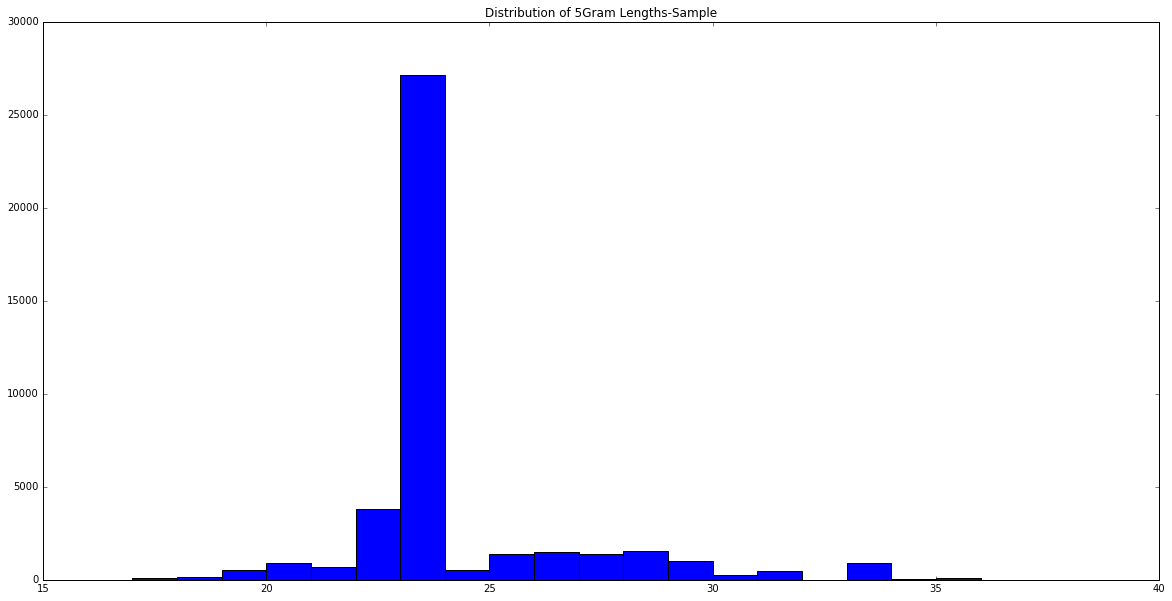

In [39]:
# tell matplotlib not to open a new window
%matplotlib inline

# import pandas and matplotlib to load
# the data and plot the histogram
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# read in the data as a data frame
data = pd.read_table('length_dist',header=None)
data_count = data.iloc[:,1]
data_lengt = data.iloc[:,0]

# gives histogram bars a width
width = 1.0 

# plot the histogram
plt.figure(figsize=(20,10))
plt.bar(data_lengt,data_count, width, color='b')
plt.title("Distribution of 5Gram Lengths-Sample")
plt.show()

### Run the program on the complete data
Now that we've unit tested, let's move on to actually running the analysis on the complete data.

In [506]:
# run the program with the cluster we 
# just spun up, still on the test data
!aws s3 rm --recursive s3://aks-w261-hw5/out_5_3
!python distSize.py -r emr s3://filtered-5grams/ \
    --cluster-id=j-2C5FHH6GSAKSB \
    --aws-region=us-west-1 \
    --output-dir=s3://aks-w261-hw5/out_5_3 \
    --no-output

delete: s3://aks-w261-hw5/out_5_3/_SUCCESS
delete: s3://aks-w261-hw5/out_5_3/part-00000     
Using configs in /Users/Alex/.mrjob.conf
Unexpected option hadoop from /Users/Alex/.mrjob.conf
Using s3://mrjob-f8c316b67324528f/tmp/ as our temp dir on S3
Creating temp directory /var/folders/k8/fy2j66nj4xsczx6cbcxhjlvm0000gn/T/distSize.Alex.20160619.034106.675317
Copying local files to s3://mrjob-f8c316b67324528f/tmp/distSize.Alex.20160619.034106.675317/files/...
Adding our job to existing cluster j-2C5FHH6GSAKSB
Waiting for step 1 of 1 (s-YGA8ZOFVHT7K) to complete...
  Opening ssh tunnel to resource manager...
  Connect to resource manager at: http://localhost:40531/cluster
  RUNNING for 16.1s
   100.0% complete
  RUNNING for 48.8s
     5.0% complete
  RUNNING for 79.6s
     7.8% complete
  RUNNING for 111.5s
    10.4% complete
  RUNNING for 143.2s
    13.7% complete
  RUNNING for 174.9s
    16.2% complete
  RUNNING for 206.2s
    19.4% complete
  RUNNING for 237.9s
    22.7% complete
  RUNN

In [507]:
# make a directory to hold the longest ngram
# files
!mkdir /Users/Alex/Documents/Berkeley/1602Summer/W261/HW5/5_3_distribution

# sync the files to a local directory
!aws s3 sync s3://aks-w261-hw5/out_5_3 /Users/Alex/Documents/Berkeley/1602Summer/W261/HW5/5_3_distribution
!ls ~/Documents/Berkeley/1602Summer/W261/HW5/5_3_distribution
!rm ~/Documents/Berkeley/1602Summer/W261/HW5/5_3_distribution/_SUCCESS

download: s3://aks-w261-hw5/out_5_3/_SUCCESS to 5_3_distribution/_SUCCESS
download: s3://aks-w261-hw5/out_5_3/part-00000 to 5_3_distribution/part-00000
download: s3://aks-w261-hw5/out_5_3/part-00004 to 5_3_distribution/part-00004
download: s3://aks-w261-hw5/out_5_3/part-00002 to 5_3_distribution/part-00002
download: s3://aks-w261-hw5/out_5_3/part-00005 to 5_3_distribution/part-00005
download: s3://aks-w261-hw5/out_5_3/part-00006 to 5_3_distribution/part-00006
download: s3://aks-w261-hw5/out_5_3/part-00001 to 5_3_distribution/part-00001
download: s3://aks-w261-hw5/out_5_3/part-00008 to 5_3_distribution/part-00008
download: s3://aks-w261-hw5/out_5_3/part-00003 to 5_3_distribution/part-00003
download: s3://aks-w261-hw5/out_5_3/part-00007 to 5_3_distribution/part-00007
download: s3://aks-w261-hw5/out_5_3/part-00009 to 5_3_distribution/part-00009
download: s3://aks-w261-hw5/out_5_3/part-00010 to 5_3_distribution/part-00010
_SUCCESS   part-00001 part-00003 part-00005 part-00007 part-00009
pa

In [508]:
# import the os and pandas libraries
# to help us get the files and read them in
import os
import pandas as pd

# loop through our files and add each the longest
# ngrams to the dictionary, where the key is the 
# length and the value is the ngrams
indir = '/Users/Alex/Documents/Berkeley/1602Summer/W261/HW5/5_3_distribution/'
for root, dirs, filenames in os.walk(indir):
    
    # create a file that stores all the distriubtions
    with open('5_3_length_distr','w') as myfile:
    
        # loop through each file
        for filename in filenames:

            # set the filename
            filename = indir+filename

            # write every line in the file to
            # our new file
            with open(filename, 'r') as myoldfile:
                for line in myoldfile.readlines():
                    
                    # split the line and set the values
                    line = line.split()
                    length = int(line[0])
                    count = int(line[1])
                    
                    # set the string we're going to write
                    info = str(length) + "\t" + str(count) + "\n"
                    
                    myfile.write(info)
                    
# preview the file we've created
!head 5_3_length_distr

103	91
12	114018
24	894422079
36	60137979
48	802590
61	4984
73	182
9	14140
128	92
13	888866


### Plot the histogram for the complete data

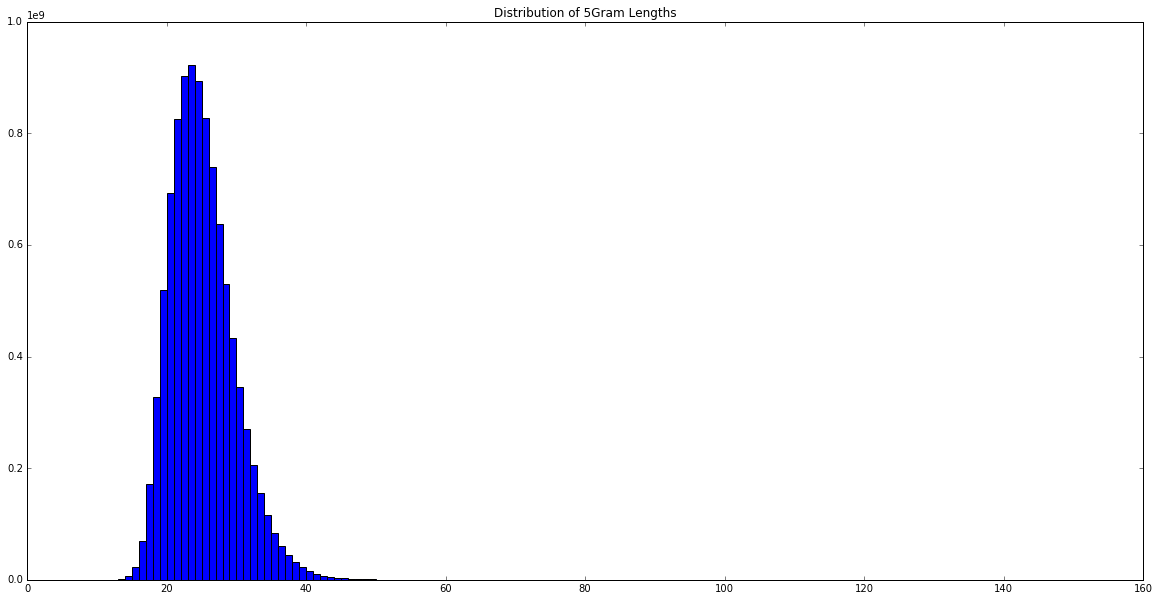

In [49]:
# tell matplotlib not to open a new window
%matplotlib inline

# import pandas and matplotlib to load
# the data and plot the histogram
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# read in the data
data = pd.read_table('5_3_length_distr',header=None)

# read in the data as a data frame
data_count = data.iloc[:,1]
data_lengt = data.iloc[:,0]

# gives histogram bars a width
width = 1.0 

# plot the histogram
plt.figure(figsize=(20,10))
plt.bar(data_lengt,data_count,width,color='b')
plt.title("Distribution of 5Gram Lengths")
plt.show()

***
## HW 5.4  Synonym detection over 2Gig of Data

*For the remainder of this assignment you will work with two datasets:<br>
**1: unit/systems test data set: SYSTEMS TEST DATASET**<br>
Three terms, A,B,C and their corresponding strip-docs of co-occurring terms<br>
DocA {X:20, Y:30, Z:5}<br>
DocB {X:100, Y:20}<br>
DocC {M:5, N:20, Z:5}<br>
<br>
**2: A large subset of the Google n-grams dataset as was described above**<br>
For each HW 5.4 -5.5.1 Please unit test and system test your code with respect to SYSTEMS TEST DATASET and show the results. Please compute the expected answer by hand and show your hand calculations for the SYSTEMS TEST DATASET. Then show the results you get with you system.<br>
<br>
In this part of the assignment we will focus on developing methods for detecting synonyms, using the Google 5-grams dataset. To accomplish this you must script two main tasks using MRJob:<br>
(1) Build stripes for the most frequent 10,000 words using cooccurence informationa based on the words ranked from 9001,-10,000 as a basis/vocabulary (drop stopword-like terms), and output to a file in your bucket on s3 (bigram analysis, though the words are non-contiguous).<br>
(2) Using two (symmetric) comparison methods of your choice (e.g., correlations, distances, similarities), pairwise compare all stripes (vectors), and output to a file in your bucket on s3.<br>
<br>
==Design notes for (1)==
For this task you will be able to modify the pattern we used in HW 3.2 (feel free to use the solution as reference). To total the word counts across the 5-grams, output the support from the mappers using the total order inversion pattern:<br>
(\*word,count)<br>
to ensure that the support arrives before the cooccurrences.<br>
<br>
In addition to ensuring the determination of the total word counts, the mapper must also output co-occurrence counts for the pairs of words inside of each 5-gram. Treat these words as a basket, as we have in HW 3, but count all stripes or pairs in both orders, i.e., count both orderings: (word1,word2), and (word2,word1), to preserve symmetry in our output for (2).<br>
==Design notes for (2)==<br>
For this task you will have to determine a method of comparison. Here are a few that you might consider:*<br>
- *Jaccard*
- *Cosine similarity*
- *Spearman correlation*
- *Euclidean distance*
- *Taxicab (Manhattan) distance*
- *Shortest path graph distance (a graph, because our data is symmetric!)*
- *Pearson correlation*
- *Kendall correlation*
...<br>

*However, be cautioned that some comparison methods are more difficult to parallelize than others, and do not perform more associations than is necessary, since your choice of association will be symmetric.<br>
Please use the inverted index (discussed in live session #5) based pattern to compute the pairwise (term-by-term) similarity matrix. <br>
Please report the size of the cluster used and the amount of time it takes to run for the index construction task and for the synonym calculation task. How many pairs need to be processed (HINT: use the posting list length to calculate directly)? Report your Cluster configuration!*

#### Generate the systems testing data set
This is borrowed and slightly modified from Annie's notebook posted to the GoogleGroup.
```
DOC         WORDS-STRIPE (count of occurrences of words M,N,X,Y,Z in documents A,B,C)

A           {X:20, Y: 30, Z:5}
B           {X:100, Y:20 }
C           {M:5, N:20, Z:5, Y:1}
```

In [197]:
# generate our system_test file
!echo \
"A\t{'X':20, 'Y':30, 'Z':5}\n"\
"B\t{'X':100, 'Y':20}\n"\
"C\t{'M':5, 'N':20, 'Z':5, 'Y':1}" > systems_test.txt
print "systems_test.txt file generated"
!cat systems_test.txt

systems_test.txt file generated
A	{'X':20, 'Y':30, 'Z':5}
B	{'X':100, 'Y':20}
C	{'M':5, 'N':20, 'Z':5, 'Y':1}


##### Binarize the stripes so that we can run cosine similarity and jaccard similarity metrics on the data.

In [198]:
# import abstract synthax trees to help
# read in the data
import ast

# Create a method that binarizes the stripes.
def binarizeStripes():
    
    # Create an output file to write binary stripes to.
    with open ('binary_stripes.txt', 'w') as output_file:
    
        # Read each line of stripes file.
        for line in open('systems_test.txt', 'r'):
            line = line.strip()
            contents = line.split("\t")
            word = contents[0]

            # Read in stripe as a dictionary
            stripe = dict(ast.literal_eval(contents[1]))

            # Iterate through each value in 
            # stripes dictionary.
            for key in stripe:

                # Set all values in stripe to 
                # binary value (aka 1).
                stripe[key] = 1

            # write to the output file each words
            # binarized document appearance
            output_file.write("\t".join([word, str(stripe)]) + "\n")

In [199]:
binarizeStripes()
!cat binary_stripes.txt

A	{'Y': 1, 'X': 1, 'Z': 1}
B	{'Y': 1, 'X': 1}
C	{'Y': 1, 'Z': 1, 'M': 1, 'N': 1}


##### Normalize the stripes
The normalization is the inverse of the square root of the sum of squares of the items in the vector. In our case, each item is equal to 1. So, we end up with the square root of the length.

In [201]:
import ast
import math

# Create a method that normalizes the binary stripes.
def NormalizeStripes():
    
    # Create an output file to write normalized 
    # stripes to.
    with open('normalized_stripes.txt', 'w') \
    as output_file:
    
        # Read each line of binarized stripes file.
        for line in open('binary_stripes.txt', 'r'):
            line = line.strip()
            contents = line.split("\t")
            word = contents[0]

            # Read in stripe as a dictionary
            stripe = dict(ast.literal_eval(contents[1]))

            # Get length of stripe to use for normalization.
            stripeLen = len(stripe)

            # Iterate through each value in stripes dictionary.
            for key in stripe:

                # Normalize each value by dividing by 
                # sqrt(stripeLength).
                stripe[key] = float(1)/math.sqrt(stripeLen)

            # write to the output file
            output_file.write("\t".join([word, str(stripe)]) + "\n")

In [202]:
NormalizeStripes()
!cat normalized_stripes.txt

A	{'Y': 0.5773502691896258, 'X': 0.5773502691896258, 'Z': 0.5773502691896258}
B	{'Y': 0.7071067811865475, 'X': 0.7071067811865475}
C	{'Y': 0.5, 'Z': 0.5, 'M': 0.5, 'N': 0.5}


##### Create the inverted index
The inverted index is organized by word and shows what document each word appears on.
```
WORD              DOCUMENT LIST (POSTINGS LIST) 

M                 {C: 1/2}
N                 {C: 1/2}
X                 {A:1/sqrt(3), B: 1/sqrt(2)}
Y                 {A:1/sqrt(3), B:1/sqrt(2), C: 1/2}
Z                 {A:1/sqrt(3), C:1/2}
```

In [203]:
import ast
import math

# Create a method that computes the inverted index.
def CreateInvertedIndex():
    
    # Create an output file to write inverted index to.
    with open('inverted_index.txt', 'w') as outputFile:
    
        # In-memory inverted index dictionary.
        invertedIndex = {}

        # Read each line of normalized stripes file.
        for line in open('normalized_stripes.txt', 'r'):
            line = line.strip()
            contents = line.split("\t")
            word = contents[0]

            # Read in stripe as a dictionary
            stripe = dict(ast.literal_eval(contents[1]))

            # Iterate through each value in stripes dictionary and invert.
            for key,value in stripe.items():

                # Create inverted index for each value in stripe.
                if key in invertedIndex:
                    invertedIndex[key][word] = value
                else:
                    invertedIndex[key] = {word: value}

        # write to the output file
        for key,value in invertedIndex.iteritems():
            outputFile.write("\t".join([key, str(value)]) + "\n")

In [204]:
CreateInvertedIndex()
!cat inverted_index.txt

Y	{'A': 0.5773502691896258, 'C': 0.5, 'B': 0.7071067811865475}
X	{'A': 0.5773502691896258, 'B': 0.7071067811865475}
Z	{'A': 0.5773502691896258, 'C': 0.5}
M	{'C': 0.5}
N	{'C': 0.5}


##### Calculate the cosine similarity
To calculate the cosine similarity of two stripe documents, say A and C, compute partial similarities using dot products and aggregating partial similarities to get overall cosine similarity.

cosine(stripe A, stripe C) = A[Y]*C[Y] + A[Z]* C[Z]

Note: A[M] = A[N] = 0; C[X] = 0, hence M,N,X do not contribute to the cosine similarity.

```
Cosine(A,B) = (1/sqrt(3))*(1/sqrt(2)) + (1/sqrt(3))*(1/sqrt(2)) + (1/sqrt(3))*0 = 2/sqrt(6)
Cosine(A,C) = 0*(1/sqrt(2)) + 0*(1/sqrt(2)) + (1/sqrt(3))*0 + (1/sqrt(3))*1/2 + (1/sqrt(3))*1/2 = 1/sqrt(3)
Cosine(B,C) = 0*(1/sqrt(2)) + 0*(1/sqrt(2)) + (1/sqrt(2))*0 + (1/sqrt(2))*1/2 + 0*1/2 = 1/2sqrt(2)
```

In [205]:
import ast
import math

# Create a method that computes Cosine similarity from inverted index.
def ComputeCosineSim():
    
    # Create an output file to write cosine similarities to.
    with open('cosine_sim.txt', 'w') as outputFile:
    
        # In-memory inverted index dictionary.
        cosineSim = {}

        # Read each line of inverted index file.
        for line in open('inverted_index.txt', 'r'):
            line = line.strip()
            contents = line.split("\t")
            word = contents[0]

            # Read in stripe as a dictionary
            stripe = dict(ast.literal_eval(contents[1]))

            # Iterate through each pair in stripes to compute dot product.
            for key1,value1 in stripe.items():
                for key2,value2 in stripe.items():
                    if key1 != key2:
                        if (key1, key2) not in cosineSim:
                            cosineSim[(key1, key2)] = value1*value2
                        else:
                            cosineSim[(key1, key2)] += value1*value2

        # write the cosine similarities to the output file
        for key,value in cosineSim.iteritems():
            outputFile.write("\t".join([str(key), str(value)]) + "\n")

In [206]:
ComputeCosineSim()
!cat cosine_sim.txt

('B', 'C')	0.353553390593
('B', 'A')	0.816496580928
('C', 'A')	0.57735026919
('C', 'B')	0.353553390593
('A', 'B')	0.816496580928
('A', 'C')	0.57735026919


### Hand calculations

To make sur that we are on the same page as our program, we also calculate this by one, on paper. We upload the pictures here:
![step1](https://dl.dropboxusercontent.com/u/37624818/W261_Week5/Step1.JPG)
![step2](https://dl.dropboxusercontent.com/u/37624818/W261_Week5/Step2.JPG)
![step3](https://dl.dropboxusercontent.com/u/37624818/W261_Week5/Step3.JPG)
![step4](https://dl.dropboxusercontent.com/u/37624818/W261_Week5/Step4.JPG)
![step5](https://dl.dropboxusercontent.com/u/37624818/W261_Week5/Step5.JPG)

### Create our top 10,000 and synonym dictionary lists

In [512]:
!head -10000 5_3_wordcount/part-00000 > top10000
!tail -1000 top10000 > topVocab
print "Files created."

Files created.


### Size of cluster
We use a four m3.xlarge instances on Amazon Web Services.

##### <span style="color:magenta"> We now build our MRJob functions based around the simple Python functions we did above.</span>

### MRJob class to convert each document into a stripe
We remove the stop words and output the inverted index for each word. 

In [515]:
%%writefile stripeMaker.py
# import the MRJob class
from mrjob.job import MRJob
from mrjob.step import MRStep
import ast
 
class stripeMaker(MRJob):
    
    # we initalize arrays to hold the words we care
    # about. stop_words holds stop words that we wish
    # to exclude. vocab holds the vocabularly that we
    # care about each word forming stripes with. 
    # words_interest holds the words we want to form
    # stripes for
    stop_words = []
    vocab = []
    words_interest = []
    
    # define the steps of the job and the order in
    # which they will be executed
    def steps(self):
        return [MRStep(mapper_init = self.mapper_init,\
                       mapper=self.mapper,\
                       combiner=self.reducer,\
                       reducer=self.reducer)]
    
    
    # set the stop words that we want to compare
    # all the words to
    def mapper_init(self):
        
        # read in the file of stop words
        with open('stopwords.txt','r') as myfile:
            
            # read in all the lines
            for line in myfile.readlines():
                
                # if the line is not blank, append
                # it to our list of stop words
                if line.strip() != "":
                    self.stop_words.append(line.strip())
        
        # read in the file of vocab
        with open('topVocab','r') as myfile:
            
            # read all the lines
            for line in myfile.readlines():
                
                # split the line and read
                # in the vocab
                line = line.split("\t")
                word = line[1].strip()
                
                # append the word to the list
                self.vocab.append(word)
                
        # read in the file of words of interest
        with open('top10000','r') as myfile:
            
            # read all the lines
            for line in myfile.readlines():
                
                # split the line and read
                # in the word
                line = line.split("\t")
                word = line[1].strip()
                
                # append the word to the list
                self.words_interest.append(word)
    
    
    # our mapper reads in each line of data
    # and splits out the count for each word
    # and the associated document
    def mapper(self, _, line):
        
        # split the line by the tabs, set the
        # ngram and lower-case it
        line = line.split("\t")
        ngram = line[0].lower()
        count = int(line[1])

        # set the words
        words = ngram.split()
        
        # loop through each word in the ngram
        for word in words:

            # check and make sure it's in our 
            # words of interests
            if word in self.words_interest:
            
                # make sure it's not in our stop 
                # words
                if word not in self.stop_words:

                    # create a dictionary to hold the
                    # word
                    word_coocur = {}

                    # loop through all the other words
                    for other_word in words:

                        # make sure the other_word is in
                        # our vocab
                        if other_word in self.vocab:
                        
                            # make sure word not in our stop
                            # words
                            if other_word not in self.stop_words:

                                # if it's not the same word
                                if word != other_word:


                                    # if we haven't aready found
                                    # this other word for this word
                                    if other_word not in word_coocur:
                                        word_coocur[other_word] = count
                                    else:
                                        word_coocur[other_word] = \
                                        word_coocur[other_word] + count

                    # yield word and its associated
                    # co-occurences if we've actually 
                    # add a co-occurence that's not a stop word
                    if len(word_coocur) > 0:
                        yield word, str(word_coocur)
        
    
    # our reducer combines the counts for all
    # words
    def reducer(self, word, cooccurs):
        
        # create a dictionary to hold the 
        # co-occurence counts for each word
        cooccur = {}
        
        # loop through the coocurrences 
        # dictionaries, combining as we 
        # go along
        for _cooccur in cooccurs:
            
            # read in the dictionary
            _cooccur = ast.literal_eval(_cooccur)
            
            # loop through each other word
            for other_word in _cooccur:
            
                # check to see if the cooccurring words
                # are already in the coocurring dictionary,
                # if not, then add them
                if other_word not in cooccur:
                    cooccur[other_word] = 0
                
                # increment the count for the word
                cooccur[other_word] = \
                cooccur[other_word] + \
                _cooccur[other_word]
        
        # yield the word and its cooccruence
        yield word, str(cooccur)
        
if __name__ == '__main__':
    stripeMaker.run()

Overwriting stripeMaker.py


In [3]:
# make a larger file to test
!head -1000 data/googlebooks-eng-all-5gram-20090715-0-filtered.txt > test.txt
print "done making test.txt"

done making test.txt


In [6]:
%reload_ext autoreload
%autoreload 2

# import the MRJob that we created
from stripeMaker import stripeMaker

# set the data that we're going to pull
mr_job = stripeMaker(args=['test.txt','--file=stopwords.txt',\
                          '--file=top10000','--file=topVocab']) 

# create the runner and run it
with mr_job.make_runner() as runner: 
    runner.run()
    
    # create a file to store the stripes for each
    # word
    with open('stripe_coocur','w') as myfile:
    
        # stream_output: get access to the output 
        for line in runner.stream_output():

            # grab the key,value
            word,coocur =  \
            mr_job.parse_output_line(line)
            
            # set the information we want to
            # write
            info = word+"\t"+str(coocur)+"\n"
            
            # write the word,density to an
            # preliminary output file
            myfile.write(info)
            
# preview the top of the preliminary file 
# that we created
print "Preview the sripes file:"
!head stripe_coocur

Preview the sripes file:
additions	{'sanctioned': 51}
african	{'campaigns': 50}
age	{'franklin': 77}
albert	{'belgium': 46}
author	{'sanctioned': 51}
cells	{'predominance': 44}
clinical	{'pathological': 257}
coast	{'peru': 206}
complete	{'catalog': 49}
evidence	{'admitting': 42}


In [14]:
!python stripeMaker.py test.txt \
--file=stopwords.txt \
--file=top10000 \
--file=topVocab

Using configs in /Users/Alex/.mrjob.conf
Creating temp directory /var/folders/k8/fy2j66nj4xsczx6cbcxhjlvm0000gn/T/stripeMaker.Alex.20160619.153449.596917
Running step 1 of 1...
Streaming final output from /var/folders/k8/fy2j66nj4xsczx6cbcxhjlvm0000gn/T/stripeMaker.Alex.20160619.153449.596917/output...
"additions"	"{'sanctioned': 51}"
"african"	"{'campaigns': 50}"
"age"	"{'franklin': 77}"
"albert"	"{'belgium': 46}"
"author"	"{'sanctioned': 51}"
"cells"	"{'predominance': 44}"
"clinical"	"{'pathological': 257}"
"coast"	"{'peru': 206}"
"complete"	"{'catalog': 49}"
"evidence"	"{'admitting': 42}"
"glance"	"{'hasty': 79}"
"hundred"	"{'crowns': 54}"
"manufacturing"	"{'establishments': 44}"
"narrative"	"{'voyages': 532}"
"opera"	"{'extant': 47}"
"response"	"{'secreted': 51}"
"roosevelt"	"{'franklin': 77}"
"section"	"{'appointments': 79}"
"shaft"	"{'penetrating': 45}"
"tendon"	"{'attaches': 44}"
"thousand"	"{'crowns': 54}"
Removing temp directory /var/folders/k8/fy2j66nj4xsczx6cbcxhjlvm0000gn/T

#### Stripe the entire file on the cloud

In [7]:
# create the cluster
!mrjob create-cluster \
--max-hours-idle 1 \
--aws-region=us-west-1 -c ~/.mrjob.conf

Unexpected option hadoop from /Users/Alex/.mrjob.conf
Using s3://mrjob-f8c316b67324528f/tmp/ as our temp dir on S3
Creating persistent cluster to run several jobs in...
Creating temp directory /var/folders/k8/fy2j66nj4xsczx6cbcxhjlvm0000gn/T/no_script.Alex.20160619.151659.982911
Copying local files to s3://mrjob-f8c316b67324528f/tmp/no_script.Alex.20160619.151659.982911/files/...
j-25Y2I2CYBIZC3


In [11]:
# add my files to s3
!aws s3 cp stopwords.txt s3://aks-w261-hw5/stopwords.txt
!aws s3 cp top10000 s3://aks-w261-hw5/top10000
!aws s3 cp topVocab s3://aks-w261-hw5/topVocab

upload: ./stopwords.txt to s3://aks-w261-hw5/stopwords.txt
upload: ./top10000 to s3://aks-w261-hw5/top10000
upload: ./topVocab to s3://aks-w261-hw5/topVocab


In [15]:
# run the program with the cluster we 
# just spun up, still on the test data
!aws s3 rm --recursive s3://aks-w261-hw5/out_5_4
!python stripeMaker.py -r emr s3://aks-w261-hw5/test.txt \
    --file=s3://aks-w261-hw5/stopwords.txt \
    --file=s3://aks-w261-hw5/top10000 \
    --file=s3://aks-w261-hw5/topVocab \
    --cluster-id=j-25Y2I2CYBIZC3 \
    --aws-region=us-west-1 \
    --output-dir=s3://aks-w261-hw5/out_5_4 \
    --no-output

Using configs in /Users/Alex/.mrjob.conf
Unexpected option hadoop from /Users/Alex/.mrjob.conf
Using s3://mrjob-f8c316b67324528f/tmp/ as our temp dir on S3
Creating temp directory /var/folders/k8/fy2j66nj4xsczx6cbcxhjlvm0000gn/T/stripeMaker.Alex.20160619.153535.785909
Copying local files to s3://mrjob-f8c316b67324528f/tmp/stripeMaker.Alex.20160619.153535.785909/files/...
Adding our job to existing cluster j-25Y2I2CYBIZC3
Waiting for step 1 of 1 (s-UAZ6NDT24I3W) to complete...
  Opening ssh tunnel to resource manager...
  Connect to resource manager at: http://localhost:40140/cluster
  RUNNING for 11.0s
  RUNNING for 45.1s
     5.0% complete
  RUNNING for 75.9s
    58.2% complete
  RUNNING for 107.6s
   100.0% complete
  COMPLETED
Attempting to fetch counters from logs...
Looking for step log in /mnt/var/log/hadoop/steps/s-UAZ6NDT24I3W on ec2-54-183-228-122.us-west-1.compute.amazonaws.com...
  Parsing step log: ssh://ec2-54-183-228-122.us-west-1.compute.amazonaws.com/mnt/var/log/hadoop/

#### Run the word count on the entire corpus using AWS
Now that we've finished testing on a subset of the data, let's try it on the whole data set.

In [16]:
# run the program with the cluster we 
# just spun up, still on the test data
!aws s3 rm --recursive s3://aks-w261-hw5/out_5_4
!python stripeMaker.py -r emr s3://filtered-5grams/ \
    --file=s3://aks-w261-hw5/stopwords.txt \
    --file=s3://aks-w261-hw5/top10000 \
    --file=s3://aks-w261-hw5/topVocab \
    --cluster-id=j-25Y2I2CYBIZC3 \
    --aws-region=us-west-1 \
    --output-dir=s3://aks-w261-hw5/out_5_4 \
    --no-output

delete: s3://aks-w261-hw5/out_5_4/_SUCCESS
delete: s3://aks-w261-hw5/out_5_4/part-00009       
delete: s3://aks-w261-hw5/out_5_4/part-00010       
delete: s3://aks-w261-hw5/out_5_4/part-00000      
delete: s3://aks-w261-hw5/out_5_4/part-00001      
delete: s3://aks-w261-hw5/out_5_4/part-00005      
delete: s3://aks-w261-hw5/out_5_4/part-00008      
delete: s3://aks-w261-hw5/out_5_4/part-00002      
delete: s3://aks-w261-hw5/out_5_4/part-00004      
delete: s3://aks-w261-hw5/out_5_4/part-00007      
delete: s3://aks-w261-hw5/out_5_4/part-00003       
delete: s3://aks-w261-hw5/out_5_4/part-00006       
Using configs in /Users/Alex/.mrjob.conf
Unexpected option hadoop from /Users/Alex/.mrjob.conf
Using s3://mrjob-f8c316b67324528f/tmp/ as our temp dir on S3
Creating temp directory /var/folders/k8/fy2j66nj4xsczx6cbcxhjlvm0000gn/T/stripeMaker.Alex.20160619.154118.501113
Copying local files to s3://mrjob-f8c316b67324528f/tmp/stripeMaker.Alex.20160619.154118.501113/files/...
Adding our job to 

In [21]:
# make a directory to hold the longest ngram
# files
!mkdir /Users/Alex/Documents/Berkeley/1602Summer/W261/HW5/5_4_stripes1

# sync the files to a local directory and save them on s3
!aws s3 cp s3://aks-w261-hw5/out_5_4/ s3://aks-w261-hw5/5_4_stripes1/ --recursive
!aws s3 sync s3://aks-w261-hw5/5_4_stripes1 /Users/Alex/Documents/Berkeley/1602Summer/W261/HW5/5_4_stripes1
!ls ~/Documents/Berkeley/1602Summer/W261/HW5/5_4_stripes1
!rm ~/Documents/Berkeley/1602Summer/W261/HW5/5_4_stripes1/_SUCCESS

mkdir: /Users/Alex/Documents/Berkeley/1602Summer/W261/HW5/5_4_stripes1: File exists
copy: s3://aks-w261-hw5/out_5_4/part-00000 to s3://aks-w261-hw5/5_4_stripes1/part-00000
copy: s3://aks-w261-hw5/out_5_4/_SUCCESS to s3://aks-w261-hw5/5_4_stripes1/_SUCCESS
copy: s3://aks-w261-hw5/out_5_4/part-00006 to s3://aks-w261-hw5/5_4_stripes1/part-00006
copy: s3://aks-w261-hw5/out_5_4/part-00003 to s3://aks-w261-hw5/5_4_stripes1/part-00003
copy: s3://aks-w261-hw5/out_5_4/part-00002 to s3://aks-w261-hw5/5_4_stripes1/part-00002
copy: s3://aks-w261-hw5/out_5_4/part-00007 to s3://aks-w261-hw5/5_4_stripes1/part-00007
copy: s3://aks-w261-hw5/out_5_4/part-00005 to s3://aks-w261-hw5/5_4_stripes1/part-00005
copy: s3://aks-w261-hw5/out_5_4/part-00008 to s3://aks-w261-hw5/5_4_stripes1/part-00008
copy: s3://aks-w261-hw5/out_5_4/part-00004 to s3://aks-w261-hw5/5_4_stripes1/part-00004
copy: s3://aks-w261-hw5/out_5_4/part-00001 to s3://aks-w261-hw5/5_4_stripes1/part-00001
copy: s3://aks-w261-hw5/out_5_4/part-000

**My stripe maker took 45 minutes running on a 4 node cluster, 1 master at m1.medium  and 3 cores at m3.xlarge. This is by far my most intensive MRJob.**

##### Binarize the stripes

In [46]:
%%writefile binarizeStripes.py
# import the MRJob class
from mrjob.job import MRJob
from mrjob.step import MRStep
import ast
 
class binarizeStripes(MRJob):
    
    # define the steps of the job and the order in
    # which they will be executed
    def steps(self):
        return [MRStep(mapper=self.mapper)]
    
    
    # our mapper reads in each line of data
    # and binarizes each stripe
    def mapper(self, _, line):
        
        # we use a try in case in case any 
        # data go written in a weird format
        try:
            # split the line by the tabs, set the
            # word and its cooccurence words
            line = line.split("\t")
            word = line[0].strip().strip("\"").strip("'")
            other_words = line[1].strip().strip("\"").strip("'")
            other_words = ast.literal_eval(other_words)

            # loop through each other word in 
            # the cooccurence matrix
            for other_word in other_words:

                # set the value equal to 1
                other_words[other_word]=1

            # yield the word with its cooccurence
            # matrix
            yield word, str(other_words)
        except:
            pass
        
        
if __name__ == '__main__':
    binarizeStripes.run()

Overwriting binarizeStripes.py


In [23]:
%reload_ext autoreload
%autoreload 2

# import the MRJob that we created
from binarizeStripes import binarizeStripes

# set the data that we're going to pull
mr_job = binarizeStripes(args=['stripe_coocur']) 

# create the runner and run it
with mr_job.make_runner() as runner: 
    runner.run()
    
    # create a file to store the stripes for each
    # word
    with open('stripe_binarized','w') as myfile:
    
        # stream_output: get access to the output 
        for line in runner.stream_output():

            # grab the key,value
            word,coocur =  \
            mr_job.parse_output_line(line)
            
            # set the information we want to
            # write
            info = word+"\t"+str(coocur)+"\n"
            
            # write the word,density to an
            # preliminary output file
            myfile.write(info)
            
# preview the top of the preliminary file 
# that we created
print "Preview the binarized stripes file:"
!head stripe_binarized

Preview the binarized stripes file:
additions	{'sanctioned': 1}
african	{'campaigns': 1}
age	{'franklin': 1}
albert	{'belgium': 1}
author	{'sanctioned': 1}
cells	{'predominance': 1}
clinical	{'pathological': 1}
coast	{'peru': 1}
complete	{'catalog': 1}
evidence	{'admitting': 1}


In [25]:
# test the binarize on a subset of the data
!head -500 5_4_stripes1/part-00004 > testing_stripes

In [2]:
# test the binarize function on this 
# larger output locally
!python binarizeStripes.py testing_stripes > temp.txt
!head -1 temp.txt

Using configs in /Users/Alex/.mrjob.conf
Creating temp directory /var/folders/k8/fy2j66nj4xsczx6cbcxhjlvm0000gn/T/binarizeStripes.Alex.20160620.232750.602429
Running step 1 of 1...
Streaming final output from /var/folders/k8/fy2j66nj4xsczx6cbcxhjlvm0000gn/T/binarizeStripes.Alex.20160620.232750.602429/output...
Removing temp directory /var/folders/k8/fy2j66nj4xsczx6cbcxhjlvm0000gn/T/binarizeStripes.Alex.20160620.232750.602429...
"abandoned"	"{'restless': 1, 'humiliation': 1, 'tents': 1, 'defenders': 1, 'pursuits': 1, 'athenians': 1, 'traitor': 1, 'nova': 1, 'habitation': 1, 'anarchy': 1, 'forts': 1, 'metaphysical': 1, 'damp': 1, 'enumeration': 1, 'speedily': 1, 'mate': 1, 'judicious': 1, 'cunning': 1, 'officially': 1, 'exhaustion': 1, 'jungle': 1, 'hue': 1, 'metropolis': 1, 'relic': 1, 'housed': 1, 'cart': 1, 'questioning': 1, 'domains': 1, 'travellers': 1, 'ordinances': 1, 'sinners': 1, 'licence': 1, 'lutheran': 1, 'forfeited': 1, 'arduous': 1, 'detroit': 1, 'fide': 1, 'natures': 1, 'b

#### Run the binarize on the entire dataset in the cloud

In [48]:
# run the program with the cluster we 
# just spun up, on the stripes that we
# just made
!aws s3 rm --recursive s3://aks-w261-hw5/out_5_4
!python binarizeStripes.py -r emr s3://aks-w261-hw5/5_4_stripes1/ \
    --cluster-id=j-25Y2I2CYBIZC3 \
    --aws-region=us-west-1 \
    --output-dir=s3://aks-w261-hw5/out_5_4 \
    --no-output

delete: s3://aks-w261-hw5/out_5_4/part-00000
delete: s3://aks-w261-hw5/out_5_4/part-00010       
delete: s3://aks-w261-hw5/out_5_4/part-00011       
delete: s3://aks-w261-hw5/out_5_4/part-00004       
delete: s3://aks-w261-hw5/out_5_4/part-00003       
delete: s3://aks-w261-hw5/out_5_4/part-00012       
delete: s3://aks-w261-hw5/out_5_4/part-00002       
delete: s3://aks-w261-hw5/out_5_4/part-00006       
delete: s3://aks-w261-hw5/out_5_4/part-00009       
delete: s3://aks-w261-hw5/out_5_4/part-00008       
delete: s3://aks-w261-hw5/out_5_4/part-00007        
delete: s3://aks-w261-hw5/out_5_4/part-00005        
delete: s3://aks-w261-hw5/out_5_4/part-00001        
delete: s3://aks-w261-hw5/out_5_4/part-00013       
delete: s3://aks-w261-hw5/out_5_4/part-00014       
delete: s3://aks-w261-hw5/out_5_4/part-00015       
delete: s3://aks-w261-hw5/out_5_4/part-00016       
delete: s3://aks-w261-hw5/out_5_4/part-00017       
delete: s3://aks-w261-hw5/out_5_4/part-00018       
delete: s3://aks

#### Store the binarize stripes locally and make a folder for them on S3

In [49]:
# make a directory to hold the longest ngram
# files
!mkdir /Users/Alex/Documents/Berkeley/1602Summer/W261/HW5/5_4_bin_stripes1

# sync the files to a local directory and save them on s3
!aws s3 cp s3://aks-w261-hw5/out_5_4/ s3://aks-w261-hw5/5_4_bin_stripes1/ --recursive
!aws s3 sync s3://aks-w261-hw5/5_4_bin_stripes1 /Users/Alex/Documents/Berkeley/1602Summer/W261/HW5/5_4_bin_stripes1
!ls ~/Documents/Berkeley/1602Summer/W261/HW5/5_4_bin_stripes1
!rm ~/Documents/Berkeley/1602Summer/W261/HW5/5_4_bin_stripes1/_SUCCESS

copy: s3://aks-w261-hw5/out_5_4/_SUCCESS to s3://aks-w261-hw5/5_4_bin_stripes1/_SUCCESS
copy: s3://aks-w261-hw5/out_5_4/part-00003 to s3://aks-w261-hw5/5_4_bin_stripes1/part-00003
copy: s3://aks-w261-hw5/out_5_4/part-00006 to s3://aks-w261-hw5/5_4_bin_stripes1/part-00006
copy: s3://aks-w261-hw5/out_5_4/part-00001 to s3://aks-w261-hw5/5_4_bin_stripes1/part-00001
copy: s3://aks-w261-hw5/out_5_4/part-00007 to s3://aks-w261-hw5/5_4_bin_stripes1/part-00007
copy: s3://aks-w261-hw5/out_5_4/part-00005 to s3://aks-w261-hw5/5_4_bin_stripes1/part-00005
copy: s3://aks-w261-hw5/out_5_4/part-00002 to s3://aks-w261-hw5/5_4_bin_stripes1/part-00002
copy: s3://aks-w261-hw5/out_5_4/part-00004 to s3://aks-w261-hw5/5_4_bin_stripes1/part-00004
copy: s3://aks-w261-hw5/out_5_4/part-00009 to s3://aks-w261-hw5/5_4_bin_stripes1/part-00009
copy: s3://aks-w261-hw5/out_5_4/part-00008 to s3://aks-w261-hw5/5_4_bin_stripes1/part-00008
copy: s3://aks-w261-hw5/out_5_4/part-00010 to s3://aks-w261-hw5/5_4_bin_stripes1/par

##### Write the MRJob class to normalize the words in the stripes
The normalization is the inverse of the square root of the sum of squares of the items in the vector. **Because we have already binarized, we can just take the inverse of the square root of the length of each cooccurence matrix.**

In [57]:
%%writefile normalizeStripes.py
# import the MRJob class
from mrjob.job import MRJob
from mrjob.step import MRStep
import ast
import math
 
class normalizeStripes(MRJob):
    """This class normalizes successfully if 
    we've already binarized"""
    
    
    # define the steps of the job and the order in
    # which they will be executed
    def steps(self):
        return [MRStep(mapper=self.mapper)]
    
    
    # our mapper reads in each line of data
    # and normalizes each stripe
    def mapper(self, _, line):
        
        # we use a try in case in case any 
        # data go written in a weird format
        try:
            # split the line by the tabs, set the
            # word and its cooccurence words
            line = line.split("\t")
            word = line[0].strip().strip("\"").strip("'")
            other_words = line[1].strip().strip("\"").strip("'")
            other_words = ast.literal_eval(other_words)
        
            # initalize a sum value
            total = len(other_words)

            # loop through each other word again,
            # this time using the total to normalize
            # remember that we normalize by the inverse
            # of the square root of the sum of the squares
            # of the values, but since we've binarized
            # we can just take the inverse of the square
            # root of the length of each coocurence matrix
            for other_word in other_words:

                # set the value equal to the value
                # divided by the squareroot of the length
                other_words[other_word] = 1.0/math.sqrt(total)
        
            # yield the word with its cooccurence
            # matrix
            yield word, str(other_words)
            
        except:
            pass
        
        
if __name__ == '__main__':
    normalizeStripes.run()

Overwriting normalizeStripes.py


In [51]:
%reload_ext autoreload
%autoreload 2

# import the MRJob that we created
from normalizeStripes import normalizeStripes

# set the data that we're going to pull
mr_job = normalizeStripes(args=['stripe_binarized']) 

# create the runner and run it
with mr_job.make_runner() as runner: 
    runner.run()
    
    # create a file to store the stripes for each
    # word
    with open('stripe_normalized','w') as myfile:
    
        # stream_output: get access to the output 
        for line in runner.stream_output():

            # grab the key,value
            word,coocur =  \
            mr_job.parse_output_line(line)
            
            # set the information we want to
            # write
            info = word+"\t"+str(coocur)+"\n"
            
            # write the word,density to an
            # preliminary output file
            myfile.write(info)
            
# preview the top of the preliminary file 
# that we created
print "Preview the normalized stripes file:"
!head stripe_normalized

Preview the normalized stripes file:
additions	{'sanctioned': 1.0}
african	{'campaigns': 1.0}
age	{'franklin': 1.0}
albert	{'belgium': 1.0}
author	{'sanctioned': 1.0}
cells	{'predominance': 1.0}
clinical	{'pathological': 1.0}
coast	{'peru': 1.0}
complete	{'catalog': 1.0}
evidence	{'admitting': 1.0}


In [58]:
# test on the command line
!python normalizeStripes.py stripe_binarized

Using configs in /Users/Alex/.mrjob.conf
Creating temp directory /var/folders/k8/fy2j66nj4xsczx6cbcxhjlvm0000gn/T/normalizeStripes.Alex.20160619.172649.464379
Running step 1 of 1...
Streaming final output from /var/folders/k8/fy2j66nj4xsczx6cbcxhjlvm0000gn/T/normalizeStripes.Alex.20160619.172649.464379/output...
"additions"	"{'sanctioned': 1.0}"
"african"	"{'campaigns': 1.0}"
"age"	"{'franklin': 1.0}"
"albert"	"{'belgium': 1.0}"
"author"	"{'sanctioned': 1.0}"
"cells"	"{'predominance': 1.0}"
"clinical"	"{'pathological': 1.0}"
"coast"	"{'peru': 1.0}"
"complete"	"{'catalog': 1.0}"
"evidence"	"{'admitting': 1.0}"
"glance"	"{'hasty': 1.0}"
"hundred"	"{'crowns': 1.0}"
"manufacturing"	"{'establishments': 1.0}"
"narrative"	"{'voyages': 1.0}"
"opera"	"{'extant': 1.0}"
"response"	"{'secreted': 1.0}"
"roosevelt"	"{'franklin': 1.0}"
"section"	"{'appointments': 1.0}"
"shaft"	"{'penetrating': 1.0}"
"tendon"	"{'attaches': 1.0}"
"thousand"	"{'crowns': 1.0}"
Removing temp directory /var/folders/k8/fy2j

#### Run normalize on the stripes in the cloud

In [59]:
# run the program with the cluster we 
# just spun up, on the stripes that we
# just binarized
!aws s3 rm --recursive s3://aks-w261-hw5/out_5_4
!python normalizeStripes.py -r emr s3://aks-w261-hw5/5_4_bin_stripes1/ \
    --cluster-id=j-25Y2I2CYBIZC3 \
    --aws-region=us-west-1 \
    --output-dir=s3://aks-w261-hw5/out_5_4 \
    --no-output

delete: s3://aks-w261-hw5/out_5_4/part-00001
delete: s3://aks-w261-hw5/out_5_4/part-00010       
delete: s3://aks-w261-hw5/out_5_4/part-00011       
delete: s3://aks-w261-hw5/out_5_4/part-00004       
delete: s3://aks-w261-hw5/out_5_4/part-00003       
delete: s3://aks-w261-hw5/out_5_4/part-00012       
delete: s3://aks-w261-hw5/out_5_4/part-00002       
delete: s3://aks-w261-hw5/out_5_4/part-00007       
delete: s3://aks-w261-hw5/out_5_4/part-00000       
delete: s3://aks-w261-hw5/out_5_4/part-00009       
delete: s3://aks-w261-hw5/out_5_4/part-00005        
delete: s3://aks-w261-hw5/out_5_4/part-00008        
delete: s3://aks-w261-hw5/out_5_4/part-00006        
delete: s3://aks-w261-hw5/out_5_4/part-00013        
delete: s3://aks-w261-hw5/out_5_4/part-00014       
delete: s3://aks-w261-hw5/out_5_4/part-00015       
delete: s3://aks-w261-hw5/out_5_4/part-00016       
delete: s3://aks-w261-hw5/out_5_4/part-00017       
delete: s3://aks-w261-hw5/out_5_4/part-00018       
delete: s3://ak

#### Store the normalized stripes locally and make a folder for them on S3

In [60]:
# make a directory to hold the longest ngram
# files
!mkdir /Users/Alex/Documents/Berkeley/1602Summer/W261/HW5/5_4_norm_stripes1

# sync the files to a local directory and save them on s3
!aws s3 cp s3://aks-w261-hw5/out_5_4/ s3://aks-w261-hw5/5_4_norm_stripes1/ --recursive
!aws s3 sync s3://aks-w261-hw5/5_4_norm_stripes1 /Users/Alex/Documents/Berkeley/1602Summer/W261/HW5/5_4_norm_stripes1
!ls ~/Documents/Berkeley/1602Summer/W261/HW5/5_4_norm_stripes1
!rm ~/Documents/Berkeley/1602Summer/W261/HW5/5_4_norm_stripes1/_SUCCESS

copy: s3://aks-w261-hw5/out_5_4/_SUCCESS to s3://aks-w261-hw5/5_4_norm_stripes1/_SUCCESS
copy: s3://aks-w261-hw5/out_5_4/part-00000 to s3://aks-w261-hw5/5_4_norm_stripes1/part-00000
copy: s3://aks-w261-hw5/out_5_4/part-00007 to s3://aks-w261-hw5/5_4_norm_stripes1/part-00007
copy: s3://aks-w261-hw5/out_5_4/part-00002 to s3://aks-w261-hw5/5_4_norm_stripes1/part-00002
copy: s3://aks-w261-hw5/out_5_4/part-00003 to s3://aks-w261-hw5/5_4_norm_stripes1/part-00003
copy: s3://aks-w261-hw5/out_5_4/part-00004 to s3://aks-w261-hw5/5_4_norm_stripes1/part-00004
copy: s3://aks-w261-hw5/out_5_4/part-00001 to s3://aks-w261-hw5/5_4_norm_stripes1/part-00001
copy: s3://aks-w261-hw5/out_5_4/part-00008 to s3://aks-w261-hw5/5_4_norm_stripes1/part-00008
copy: s3://aks-w261-hw5/out_5_4/part-00006 to s3://aks-w261-hw5/5_4_norm_stripes1/part-00006
copy: s3://aks-w261-hw5/out_5_4/part-00005 to s3://aks-w261-hw5/5_4_norm_stripes1/part-00005
copy: s3://aks-w261-hw5/out_5_4/part-00009 to s3://aks-w261-hw5/5_4_norm_s

##### MRJob Class to create the inverted matrix

In [61]:
%%writefile invertIndex.py
# import the MRJob class
from mrjob.job import MRJob
from mrjob.step import MRStep
import ast
import math
 
class invertIndex(MRJob):
    
    # define the steps of the job and the order in
    # which they will be executed
    def steps(self):
        return [MRStep(mapper=self.mapper,\
                       combiner=self.reducer,\
                       reducer=self.reducer)]
    
    
    # our mapper reads in each line of data
    # and inverts each stripe
    def mapper(self, _, line):
        
        # we use a try in case in case any 
        # data go written in a weird format
        try:
            # split the line by the tabs, set the
            # word and its cooccurence words
            line = line.split("\t")
            word = line[0].strip().strip("\"").strip("'")
            other_words = line[1].strip().strip("\"").strip("'")
            other_words = ast.literal_eval(other_words)

            # loop through each of the other words
            for other_word in other_words:

                # create a dictionary for the 
                # invert, holds the word and 
                # inverted value
                inverted_value = \
                other_words[other_word]
                invert = {word:inverted_value}

                # yield the inverted word with 
                # its inverted value
                yield other_word, str(invert)
                
        except:
            pass
    
    # our reducer combines the inverted values
    # for multiple words
    def reducer(self, word, cooccurs):
        
        # create a dictionary to hold the 
        # co-occurence counts for each word
        cooccur = {}
        
        # loop through the coocurrences 
        # dictionaries, combining as we 
        # go along
        for _cooccur in cooccurs:
            
            # read in the dictionary
            _cooccur = ast.literal_eval(_cooccur)
            
            # loop through each other word
            for other_word in _cooccur:
            
                cooccur[other_word] = \
                _cooccur[other_word]
        
        # yield the word and its cooccruence
        yield word, str(cooccur)      
        
if __name__ == '__main__':
    invertIndex.run()

Overwriting invertIndex.py


In [255]:
%reload_ext autoreload
%autoreload 2

# import the MRJob that we created
from invertIndex import invertIndex

# set the data that we're going to pull
mr_job = invertIndex(args=['stripe_normalized']) 

# create the runner and run it
with mr_job.make_runner() as runner: 
    runner.run()
    
    # create a file to store the stripes for each
    # word
    with open('stripe_invert','w') as myfile:
    
        # stream_output: get access to the output 
        for line in runner.stream_output():

            # grab the key,value
            word,coocur =  \
            mr_job.parse_output_line(line)
            
            # set the information we want to
            # write
            info = word+"\t"+str(coocur)+"\n"
            
            # write the word,density to an
            # preliminary output file
            myfile.write(info)
            
# preview the top of the preliminary file 
# that we created
print "Preview the inverted stripes file:"
!head stripe_invert

Preview the inverted stripes file:
addressed	{'sermon': 1.0}
aerial	{'navigation': 0.7071067811865475, 'history': 0.30151134457776363}
america's	{'guide': 0.4472135954999579, 'censorship': 0.7071067811865475}
american	{'postwar': 0.7071067811865475, 'narrative': 0.5773502691896258, 'history': 0.30151134457776363}
analysis	{'physiological': 1.0}
apology	{'commentary': 1.0}
arithmetic	{'key': 0.5773502691896258}
aspiration	{'marrow': 0.7071067811865475, 'bone': 0.7071067811865475}
assessment	{'methodology': 1.0}
based	{'method': 1.0}


In [62]:
# test on the commandn line
!python invertIndex.py stripe_normalized

Using configs in /Users/Alex/.mrjob.conf
Creating temp directory /var/folders/k8/fy2j66nj4xsczx6cbcxhjlvm0000gn/T/invertIndex.Alex.20160619.173352.648877
Running step 1 of 1...
Streaming final output from /var/folders/k8/fy2j66nj4xsczx6cbcxhjlvm0000gn/T/invertIndex.Alex.20160619.173352.648877/output...
"admitting"	"{'evidence': 1.0}"
"appointments"	"{'section': 1.0}"
"attaches"	"{'tendon': 1.0}"
"belgium"	"{'albert': 1.0}"
"campaigns"	"{'african': 1.0}"
"catalog"	"{'complete': 1.0}"
"crowns"	"{'thousand': 1.0, 'hundred': 1.0}"
"establishments"	"{'manufacturing': 1.0}"
"extant"	"{'opera': 1.0}"
"franklin"	"{'age': 1.0, 'roosevelt': 1.0}"
"hasty"	"{'glance': 1.0}"
"pathological"	"{'clinical': 1.0}"
"penetrating"	"{'shaft': 1.0}"
"peru"	"{'coast': 1.0}"
"predominance"	"{'cells': 1.0}"
"sanctioned"	"{'additions': 1.0, 'author': 1.0}"
"secreted"	"{'response': 1.0}"
"voyages"	"{'narrative': 1.0}"
Removing temp directory /var/folders/k8/fy2j66nj4xsczx6cbcxhjlvm0000gn/T/invertIndex.Alex.201606

#### Run inversion in the cloud

In [63]:
# run the program with the cluster we 
# just spun up, on the stripes that we
# just binarized
!aws s3 rm --recursive s3://aks-w261-hw5/out_5_4
!python invertIndex.py -r emr s3://aks-w261-hw5/5_4_norm_stripes1/ \
    --cluster-id=j-25Y2I2CYBIZC3 \
    --aws-region=us-west-1 \
    --output-dir=s3://aks-w261-hw5/out_5_4 \
    --no-output

delete: s3://aks-w261-hw5/out_5_4/_SUCCESS
delete: s3://aks-w261-hw5/out_5_4/part-00009       
delete: s3://aks-w261-hw5/out_5_4/part-00010       
delete: s3://aks-w261-hw5/out_5_4/part-00002       
delete: s3://aks-w261-hw5/out_5_4/part-00005       
delete: s3://aks-w261-hw5/out_5_4/part-00004       
delete: s3://aks-w261-hw5/out_5_4/part-00001       
delete: s3://aks-w261-hw5/out_5_4/part-00007       
delete: s3://aks-w261-hw5/out_5_4/part-00000       
delete: s3://aks-w261-hw5/out_5_4/part-00008       
delete: s3://aks-w261-hw5/out_5_4/part-00011        
delete: s3://aks-w261-hw5/out_5_4/part-00003        
delete: s3://aks-w261-hw5/out_5_4/part-00006        
delete: s3://aks-w261-hw5/out_5_4/part-00012        
delete: s3://aks-w261-hw5/out_5_4/part-00015        
delete: s3://aks-w261-hw5/out_5_4/part-00017        
delete: s3://aks-w261-hw5/out_5_4/part-00014        
delete: s3://aks-w261-hw5/out_5_4/part-00013        
delete: s3://aks-w261-hw5/out_5_4/part-00016        
delete: s3:/

#### Store the inverted index locally and make a folder on S3 for it

In [64]:
# make a directory to hold the longest ngram
# files
!mkdir /Users/Alex/Documents/Berkeley/1602Summer/W261/HW5/5_4_invert1

# sync the files to a local directory and save them on s3
!aws s3 cp s3://aks-w261-hw5/out_5_4/ s3://aks-w261-hw5/5_4_invert1/ --recursive
!aws s3 sync s3://aks-w261-hw5/5_4_invert1 /Users/Alex/Documents/Berkeley/1602Summer/W261/HW5/5_4_invert1
!ls ~/Documents/Berkeley/1602Summer/W261/HW5/5_4_invert1
!rm ~/Documents/Berkeley/1602Summer/W261/HW5/5_4_invert1/_SUCCESS

copy: s3://aks-w261-hw5/out_5_4/_SUCCESS to s3://aks-w261-hw5/5_4_invert1/_SUCCESS
copy: s3://aks-w261-hw5/out_5_4/part-00003 to s3://aks-w261-hw5/5_4_invert1/part-00003
copy: s3://aks-w261-hw5/out_5_4/part-00008 to s3://aks-w261-hw5/5_4_invert1/part-00008
copy: s3://aks-w261-hw5/out_5_4/part-00001 to s3://aks-w261-hw5/5_4_invert1/part-00001
copy: s3://aks-w261-hw5/out_5_4/part-00004 to s3://aks-w261-hw5/5_4_invert1/part-00004
copy: s3://aks-w261-hw5/out_5_4/part-00007 to s3://aks-w261-hw5/5_4_invert1/part-00007
copy: s3://aks-w261-hw5/out_5_4/part-00002 to s3://aks-w261-hw5/5_4_invert1/part-00002
copy: s3://aks-w261-hw5/out_5_4/part-00006 to s3://aks-w261-hw5/5_4_invert1/part-00006
copy: s3://aks-w261-hw5/out_5_4/part-00000 to s3://aks-w261-hw5/5_4_invert1/part-00000
copy: s3://aks-w261-hw5/out_5_4/part-00009 to s3://aks-w261-hw5/5_4_invert1/part-00009
copy: s3://aks-w261-hw5/out_5_4/part-00010 to s3://aks-w261-hw5/5_4_invert1/part-00010
copy: s3://aks-w261-hw5/out_5_4/part-00005 to s

##### MRJob to calculate the cosine similarity between terms
To calculate the cosine similarity of two stripe documents, say A and C, compute partial similarities using dot products and aggregating partial similarities to get overall cosine similarity.

In [72]:
%%writefile cosineSim.py
# import the MRJob class
from mrjob.job import MRJob
from mrjob.step import MRStep
import ast
import math
from mrjob.protocol import RawProtocol
 
class cosineSim(MRJob):
    
    MRJob.SORT_VALUES = True 
    INTERNAL_PROTOCOL = RawProtocol
    OUTPUT_PROTOCOL = RawProtocol
    
    # define the steps of the job and the order in
    # which they will be executed
    def steps(self):
        
        # set how we want to sort, we use a single reducer
        # only so that we can do a total sort, we use multiple
        # reducers for all other steps
        JOBCONF = {        
            'mapred.output.key.comparator.class': 'org.apache.hadoop.mapred.lib.KeyFieldBasedComparator',
            'mapred.text.key.comparator.options': '-k1,1nr',
            'mapreduce.job.reduces': 1,
        }
        
        return [MRStep(mapper=self.mapper,\
                       reducer=self.reducer),\
               MRStep(jobconf = JOBCONF,\
                       mapper=None,\
                       reducer=self.reducer_final)]
    
    
    # our mapper reads in each line of data
    # and outputs the partial aggregation
    # for each pair combination
    def mapper(self, _, line):
        
        
        # we use a try in case in case any 
        # data go written in a weird format
        try:
            # split the line by the tabs, set the
            # word and its cooccurence words
            line = line.split("\t")
            key = line[0].strip().strip("\"").strip("'")
            words = line[1].strip().strip("\"").strip("'")
            words = ast.literal_eval(words)

            # loop through each of the words
            for word in words:

                # loop through the rest of the 
                # rest of the words in words
                for other_word in words:

                    # as long as it isn't this 
                    # word
                    if word != other_word:

                        # get the two word values
                        word_val = words[word]
                        other_word_val = words[other_word]

                        # multiple the two together
                        # dot product, for partial 
                        # similarity
                        partial = \
                        word_val * other_word_val

                        # set the pair
                        pair = word,other_word

                        # yeild the pair and its
                        # partial similarity
                        yield str(pair),str(partial)
        except:
            pass
            
    
    # our reducer combines the partial 
    # similarities to create an aggregated
    # similarity
    def reducer(self, pair, similarities):
        
        # create a sum variable
        sum_sim = 0.0
        
        # loop through the similarities
        for similarity in similarities:
            sum_sim = sum_sim + float(similarity)
        
        # we want to make sure that the count 
        # string is at least 15 characters, if
        # its not, we add trailing zeros. this
        # helps us sort
        extend = "0"
        
        # convert density to a string
        sum_sim = str(sum_sim)
        
        # while the count lenght is less than 15
        while len(sum_sim) < 15:
            sum_sim = sum_sim + extend
        
        # yield the pair and its partial
        # similarity
        yield sum_sim, pair
        
    # our reducer final simply outputs the sorted
    # list that hadoop has conviently shuffled and
    # sorted for us
    def reducer_final(self, similarity, pairs):
        for pair in pairs:
            yield pair,similarity
        
if __name__ == '__main__':
    cosineSim.run()

Overwriting cosineSim.py


In [272]:
%reload_ext autoreload
%autoreload 2

# import the MRJob that we created
from cosineSim import cosineSim

# set the data that we're going to pull
mr_job = cosineSim(args=['stripe_invert']) 

# create the runner and run it
with mr_job.make_runner() as runner: 
    runner.run()
    
    # create a file to store the stripes for each
    # word
    with open('cosineSimilarities','w') as myfile:
    
        # stream_output: get access to the output 
        for line in runner.stream_output():

            # grab the key,value
            pair,similarity =  \
            mr_job.parse_output_line(line)
            
            # set the information we want to
            # write
            info = str(pair)+"\t"+str(similarity)+"\n"
            
            # write the word,density to an
            # preliminary output file
            myfile.write(info)
            
# preview the top of the preliminary file 
# that we created
print "Preview the cosine similarities file:"
!head cosineSimilarities

Preview the cosine similarities file:
['aerial', 'american']	0.408248290464
['aerial', 'eurobond']	0.707106781187
['aerial', 'history']	0.213200716356
['aerial', 'modern']	0.408248290464
['aerial', 'navigation']	0.5
['aerial', 'postwar']	0.5
['aerial', 'railroads']	0.408248290464
['aerial', 'southeast']	0.5
['aerial', 'travel']	0.707106781187
['aerial', 'united']	0.707106781187


In [3]:
# run on the command line
!python cosineSim.py stripe_invert > temp.txt
!head temp.txt

Using configs in /Users/Alex/.mrjob.conf
ignoring partitioner keyword arg (requires real Hadoop): 'org.apache.hadoop.mapred.lib.KeyFieldBasedPartitioner'
Creating temp directory /var/folders/k8/fy2j66nj4xsczx6cbcxhjlvm0000gn/T/cosineSim.Alex.20160620.232846.271681
Running step 1 of 2...
Running step 2 of 2...
Streaming final output from /var/folders/k8/fy2j66nj4xsczx6cbcxhjlvm0000gn/T/cosineSim.Alex.20160620.232846.271681/output...
Removing temp directory /var/folders/k8/fy2j66nj4xsczx6cbcxhjlvm0000gn/T/cosineSim.Alex.20160620.232846.271681...
('life', 'study')	0.0912870929175
('study', 'life')	0.0912870929175
('key', 'study')	0.1290994448740
('study', 'key')	0.1290994448740
('history', 'practical')	0.1507556722890
('practical', 'history')	0.1507556722890
('bibliographical', 'study')	0.1581138830080
('communities', 'study')	0.1581138830080
('comparative', 'study')	0.1581138830080
('conceptual', 'study')	0.1581138830080


#### Run the cosine similarity across the entire dataset on the cloud

In [74]:
# run the program with the cluster we 
# just spun up, on the stripes that we
# just binarized
!aws s3 rm --recursive s3://aks-w261-hw5/out_5_4
!python cosineSim.py -r emr s3://aks-w261-hw5/5_4_invert1/ \
    --cluster-id=j-25Y2I2CYBIZC3 \
    --aws-region=us-west-1 \
    --output-dir=s3://aks-w261-hw5/out_5_4 \
    --no-output

delete: s3://aks-w261-hw5/out_5_4/_SUCCESS
delete: s3://aks-w261-hw5/out_5_4/part-00009       
delete: s3://aks-w261-hw5/out_5_4/part-00010       
delete: s3://aks-w261-hw5/out_5_4/part-00001      
delete: s3://aks-w261-hw5/out_5_4/part-00005      
delete: s3://aks-w261-hw5/out_5_4/part-00003      
delete: s3://aks-w261-hw5/out_5_4/part-00006      
delete: s3://aks-w261-hw5/out_5_4/part-00002      
delete: s3://aks-w261-hw5/out_5_4/part-00008      
delete: s3://aks-w261-hw5/out_5_4/part-00004      
delete: s3://aks-w261-hw5/out_5_4/part-00007       
delete: s3://aks-w261-hw5/out_5_4/part-00000       
Using configs in /Users/Alex/.mrjob.conf
Unexpected option hadoop from /Users/Alex/.mrjob.conf
Using s3://mrjob-f8c316b67324528f/tmp/ as our temp dir on S3
Creating temp directory /var/folders/k8/fy2j66nj4xsczx6cbcxhjlvm0000gn/T/cosineSim.Alex.20160619.180114.892883
Copying local files to s3://mrjob-f8c316b67324528f/tmp/cosineSim.Alex.20160619.180114.892883/files/...
Adding our job to exis

#### Save the similarity files locally and create a bucket for them in the cloud
This bucket can be accessed here: s3://aks-w261-hw5/5_4_cosineSim/

In [75]:
# make a directory to hold the longest ngram
# files
!mkdir /Users/Alex/Documents/Berkeley/1602Summer/W261/HW5/5_4_cosineSim

# sync the files to a local directory and save them on s3
!aws s3 cp s3://aks-w261-hw5/out_5_4/ s3://aks-w261-hw5/5_4_cosineSim/ --recursive
!aws s3 sync s3://aks-w261-hw5/5_4_cosineSim /Users/Alex/Documents/Berkeley/1602Summer/W261/HW5/5_4_cosineSim
!ls ~/Documents/Berkeley/1602Summer/W261/HW5/5_4_cosineSim
!rm ~/Documents/Berkeley/1602Summer/W261/HW5/5_4_cosineSim/_SUCCESS

copy: s3://aks-w261-hw5/out_5_4/_SUCCESS to s3://aks-w261-hw5/5_4_cosineSim/_SUCCESS
copy: s3://aks-w261-hw5/out_5_4/part-00000 to s3://aks-w261-hw5/5_4_cosineSim/part-00000
download: s3://aks-w261-hw5/5_4_cosineSim/_SUCCESS to 5_4_cosineSim/_SUCCESS
download: s3://aks-w261-hw5/5_4_cosineSim/part-00000 to 5_4_cosineSim/part-00000
_SUCCESS   part-00000


#### Preview the top similarities

In [76]:
!head ~/Documents/Berkeley/1602Summer/W261/HW5/5_4_cosineSim/part-00000

('predicated', 'substantive')		0.7071067811870
('substantive', 'predicated')		0.7071067811870
('ammonia', 'hydrochloric')		0.5962847940000
('hydrochloric', 'ammonia')		0.5962847940000
('oxidation', 'solubility')		0.5685352436150
('solubility', 'oxidation')		0.5685352436150
('flexor', 'tendon')		0.5590169943750
('tendon', 'flexor')		0.5590169943750
('hydrochloric', 'hydroxide')		0.5477225575050
('hydroxide', 'hydrochloric')		0.5477225575050


### Now let's move on to Jaccard Similarities
We've completed cosine similarities. Let's know calculate the Jaccard similarities.

##### Make the MRJob class that indexes the data for Jaccard Similarities

In [77]:
%%writefile stripeMaker_jac.py
# import the MRJob class
from mrjob.job import MRJob
from mrjob.step import MRStep
import ast
 
class stripeMaker_jac(MRJob):
    
    # we initalize arrays to hold the words we care
    # about. stop_words holds stop words that we wish
    # to exclude. vocab holds the vocabularly that we
    # care about each word forming stripes with. 
    # words_interest holds the words we want to form
    # stripes for
    stop_words = []
    vocab = []
    words_interest = []
    
    # define the steps of the job and the order in
    # which they will be executed
    def steps(self):
        return [MRStep(mapper_init = self.mapper_init,\
                       mapper=self.mapper,\
                       combiner=self.reducer,\
                       reducer=self.reducer)]
    
    
    # set the stop words that we want to compare
    # all the words to
    def mapper_init(self):
        
        # read in the file of stop words
        with open('stopwords.txt','r') as myfile:
            
            # read in all the lines
            for line in myfile.readlines():
                
                # if the line is not blank, append
                # it to our list of stop words
                if line.strip() != "":
                    self.stop_words.append(line.strip())
        
        # read in the file of vocab
        with open('topVocab','r') as myfile:
            
            # read all the lines
            for line in myfile.readlines():
                
                # split the line and read
                # in the vocab
                line = line.split("\t")
                word = line[1].strip()
                
                # append the word to the list
                self.vocab.append(word)
                
        # read in the file of words of interest
        with open('top10000','r') as myfile:
            
            # read all the lines
            for line in myfile.readlines():
                
                # split the line and read
                # in the word
                line = line.split("\t")
                word = line[1].strip()
                
                # append the word to the list
                self.words_interest.append(word)
    
    
    # our mapper reads in each line of data
    # and splits out the count for each word
    # and the associated document
    def mapper(self, _, line):
        
        # split the line by the tabs, set the
        # ngram and lower-case it
        line = line.split("\t")
        ngram = line[0].lower()
        count = int(line[1])

        # set the words
        words = ngram.split()
        
        # loop through each word in the ngram
        for word in words:

            # check and make sure it's in our 
            # words of interests
            if word in self.words_interest:
            
                # make sure it's not in our stop 
                # words
                if word not in self.stop_words:

                    # create a dictionary to hold the
                    # word
                    word_coocur = {}

                    # loop through all the other words
                    for other_word in words:

                        # make sure the other_word is in
                        # our vocab
                        if other_word in self.vocab:
                        
                            # make sure word not in our stop
                            # words
                            if other_word not in self.stop_words:

                                # if it's not the same word
                                if word != other_word:


                                    # if we haven't aready found
                                    # this other word for this word
                                    if other_word not in word_coocur:
                                        word_coocur[other_word] = count
                                    else:
                                        word_coocur[other_word] = \
                                        word_coocur[other_word] + count
                                        
                        # create an entry for the word itself, it's
                        # cardinality
                        word_star = "*"+word
                        word_coocur[word_star] = count

                    # yield word and its associated
                    # co-occurences if we've actually 
                    # add a co-occurence that's not a stop word
                    if len(word_coocur) > 0:
                        yield word, str(word_coocur)
        
    
    # our reducer combines the counts for all
    # words
    def reducer(self, word, cooccurs):
        
        # create a dictionary to hold the 
        # co-occurence counts for each word
        cooccur = {}
        
        # loop through the coocurrences 
        # dictionaries, combining as we 
        # go along
        for _cooccur in cooccurs:
            
            # read in the dictionary
            _cooccur = ast.literal_eval(_cooccur)
            
            # loop through each other word
            for other_word in _cooccur:
            
                # check to see if the cooccurring words
                # are already in the coocurring dictionary,
                # if not, then add them
                if other_word not in cooccur:
                    cooccur[other_word] = 0
                
                # increment the count for the word
                cooccur[other_word] = \
                cooccur[other_word] + \
                _cooccur[other_word]
        
        # yield the word and its cooccruence
        yield word, str(cooccur)
        
if __name__ == '__main__':
    stripeMaker_jac.run()

Writing stripeMaker_jac.py


#### Test on a sample file, first locally and then on the cloud

In [9]:
# test locally using the command line
!python stripeMaker_jac.py test.txt \
--file=stopwords.txt \
--file=top10000 \
--file=topVocab \
> temp.txt
!head temp.txt

Using configs in /Users/Alex/.mrjob.conf
Creating temp directory /var/folders/k8/fy2j66nj4xsczx6cbcxhjlvm0000gn/T/stripeMaker_jac.Alex.20160620.233130.110608
Running step 1 of 1...
Streaming final output from /var/folders/k8/fy2j66nj4xsczx6cbcxhjlvm0000gn/T/stripeMaker_jac.Alex.20160620.233130.110608/output...
Removing temp directory /var/folders/k8/fy2j66nj4xsczx6cbcxhjlvm0000gn/T/stripeMaker_jac.Alex.20160620.233130.110608...
"ab"	"{'*ab': 125}"
"abandonment"	"{'*abandonment': 71}"
"ability"	"{'*ability': 41}"
"able"	"{'*able': 105}"
"abnormal"	"{'*abnormal': 53}"
"abolition"	"{'*abolition': 62}"
"abraham"	"{'*abraham': 109}"
"absorption"	"{'*absorption': 148}"
"abstract"	"{'*abstract': 77}"
"academic"	"{'*academic': 54}"


In [81]:
# test on the cloud
!aws s3 rm --recursive s3://aks-w261-hw5/out_5_4
!python stripeMaker_jac.py -r emr s3://aks-w261-hw5/test.txt \
    --file=s3://aks-w261-hw5/stopwords.txt \
    --file=s3://aks-w261-hw5/top10000 \
    --file=s3://aks-w261-hw5/topVocab \
    --cluster-id=j-25Y2I2CYBIZC3 \
    --aws-region=us-west-1 \
    --output-dir=s3://aks-w261-hw5/out_5_4 \
    --no-output

delete: s3://aks-w261-hw5/out_5_4/_SUCCESS
delete: s3://aks-w261-hw5/out_5_4/part-00000     
Using configs in /Users/Alex/.mrjob.conf
Unexpected option hadoop from /Users/Alex/.mrjob.conf
Using s3://mrjob-f8c316b67324528f/tmp/ as our temp dir on S3
Creating temp directory /var/folders/k8/fy2j66nj4xsczx6cbcxhjlvm0000gn/T/stripeMaker_jac.Alex.20160619.182212.879141
Copying local files to s3://mrjob-f8c316b67324528f/tmp/stripeMaker_jac.Alex.20160619.182212.879141/files/...
Adding our job to existing cluster j-25Y2I2CYBIZC3
Waiting for step 1 of 1 (s-1PLHFL5BCDD10) to complete...
  Opening ssh tunnel to resource manager...
  Connect to resource manager at: http://localhost:40140/cluster
  RUNNING for 21.9s
Unable to connect to resource manager
  RUNNING for 54.3s
  RUNNING for 84.9s
  COMPLETED
Attempting to fetch counters from logs...
Looking for step log in /mnt/var/log/hadoop/steps/s-1PLHFL5BCDD10 on ec2-54-183-228-122.us-west-1.compute.amazonaws.com...
  Parsing step log: ssh://ec2-54-

#### Run the index maker on the entire corpus on the cloud

In [82]:
# run on the cloud
!aws s3 rm --recursive s3://aks-w261-hw5/out_5_4
!python stripeMaker_jac.py -r emr s3://filtered-5grams/ \
    --file=s3://aks-w261-hw5/stopwords.txt \
    --file=s3://aks-w261-hw5/top10000 \
    --file=s3://aks-w261-hw5/topVocab \
    --cluster-id=j-25Y2I2CYBIZC3 \
    --aws-region=us-west-1 \
    --output-dir=s3://aks-w261-hw5/out_5_4 \
    --no-output

delete: s3://aks-w261-hw5/out_5_4/part-00000
delete: s3://aks-w261-hw5/out_5_4/part-00009       
delete: s3://aks-w261-hw5/out_5_4/part-00010       
delete: s3://aks-w261-hw5/out_5_4/part-00007      
delete: s3://aks-w261-hw5/out_5_4/part-00003      
delete: s3://aks-w261-hw5/out_5_4/part-00001      
delete: s3://aks-w261-hw5/out_5_4/part-00002      
delete: s3://aks-w261-hw5/out_5_4/_SUCCESS        
delete: s3://aks-w261-hw5/out_5_4/part-00004      
delete: s3://aks-w261-hw5/out_5_4/part-00008      
delete: s3://aks-w261-hw5/out_5_4/part-00005       
delete: s3://aks-w261-hw5/out_5_4/part-00006       
Using configs in /Users/Alex/.mrjob.conf
Unexpected option hadoop from /Users/Alex/.mrjob.conf
Using s3://mrjob-f8c316b67324528f/tmp/ as our temp dir on S3
Creating temp directory /var/folders/k8/fy2j66nj4xsczx6cbcxhjlvm0000gn/T/stripeMaker_jac.Alex.20160619.182649.857818
Copying local files to s3://mrjob-f8c316b67324528f/tmp/stripeMaker_jac.Alex.20160619.182649.857818/files/...
Adding o

**My stripe maker took 50 minutes running on a 4 node cluster, 1 master at m1.medium  and 3 cores at m3.xlarge. This is by far my most intensive MRJob. This took 5 minutes longer than my stripe maker for the cosine similarities likely because this stripemaker outputted more information.**

#### Copy the index locally and save it on S3

In [83]:
# make a directory to hold the longest ngram
# files
!mkdir /Users/Alex/Documents/Berkeley/1602Summer/W261/HW5/5_4_stripes2

# sync the files to a local directory and save them on s3
!aws s3 cp s3://aks-w261-hw5/out_5_4/ s3://aks-w261-hw5/5_4_stripes2/ --recursive
!aws s3 sync s3://aks-w261-hw5/5_4_stripes2 /Users/Alex/Documents/Berkeley/1602Summer/W261/HW5/5_4_stripes2
!ls ~/Documents/Berkeley/1602Summer/W261/HW5/5_4_stripes2
!rm ~/Documents/Berkeley/1602Summer/W261/HW5/5_4_stripes2/_SUCCESS

copy: s3://aks-w261-hw5/out_5_4/_SUCCESS to s3://aks-w261-hw5/5_4_stripes2/_SUCCESS
copy: s3://aks-w261-hw5/out_5_4/part-00003 to s3://aks-w261-hw5/5_4_stripes2/part-00003
copy: s3://aks-w261-hw5/out_5_4/part-00006 to s3://aks-w261-hw5/5_4_stripes2/part-00006
copy: s3://aks-w261-hw5/out_5_4/part-00005 to s3://aks-w261-hw5/5_4_stripes2/part-00005
copy: s3://aks-w261-hw5/out_5_4/part-00000 to s3://aks-w261-hw5/5_4_stripes2/part-00000
copy: s3://aks-w261-hw5/out_5_4/part-00008 to s3://aks-w261-hw5/5_4_stripes2/part-00008
copy: s3://aks-w261-hw5/out_5_4/part-00004 to s3://aks-w261-hw5/5_4_stripes2/part-00004
copy: s3://aks-w261-hw5/out_5_4/part-00007 to s3://aks-w261-hw5/5_4_stripes2/part-00007
copy: s3://aks-w261-hw5/out_5_4/part-00002 to s3://aks-w261-hw5/5_4_stripes2/part-00002
copy: s3://aks-w261-hw5/out_5_4/part-00001 to s3://aks-w261-hw5/5_4_stripes2/part-00001
copy: s3://aks-w261-hw5/out_5_4/part-00009 to s3://aks-w261-hw5/5_4_stripes2/part-00009
copy: s3://aks-w261-hw5/out_5_4/part

In [84]:
# save a portion of one of the files for testing the next MRJob
!head -500 ~/Documents/Berkeley/1602Summer/W261/HW5/5_4_stripes2/part-00000 > test_stripes2
print "Testing stripes for Jaccard created."

Testing stripes for Jaccard created.


#### Invert the index through MRJob

In [90]:
%%writefile invert_jac.py
# import the MRJob class
from mrjob.job import MRJob
from mrjob.step import MRStep
import ast
import math
 
class invert_jac(MRJob):
    
    # define the steps of the job and the order in
    # which they will be executed
    def steps(self):
        return [MRStep(mapper=self.mapper,\
                       reducer=self.reducer)]
    
    
    # our mapper reads in each line of data
    # and inverts each stripe
    def mapper(self, _, line):
        
        # we use a try in case in case any 
        # data go written in a weird format
        try:
            # split the line by the tabs, set the
            # word and its cooccurence words
            line = line.split("\t")
            word = line[0].strip().strip("\"").strip("'")
            other_words = line[1].strip().strip("\"").strip("'")
            other_words = ast.literal_eval(other_words)

        
            # loop through each of the other words
            for other_word in other_words:

                # make sure we don't grab a star
                # word
                if other_word[0] != "*":

                    # create a dictionary for the 
                    # invert, holds the word and 
                    # inverted value, and that words
                    # star value
                    inverted_value = \
                    other_words[other_word]
                    word_star = "*"+word
                    word_star_val = other_words[word_star]

                    # set the dictionary
                    invert = {word:inverted_value,\
                             word_star:word_star_val}

                    # yield the inverted word with 
                    # its inverted value
                    yield other_word, str(invert)
                    
        except:
            pass
    
    # our reducer combines the inverted values
    # for multiple words
    def reducer(self, word, cooccurs):
        
        # create a dictionary to hold the 
        # co-occurence counts for each word
        cooccur = {}
        
        # loop through the coocurrences 
        # dictionaries, combining as we 
        # go along
        for _cooccur in cooccurs:
            
            # read in the dictionary
            _cooccur = ast.literal_eval(_cooccur)
            
            # loop through each other word
            for other_word in _cooccur:
            
                # add the element to the dictionary
                if other_word not in cooccur:
                    cooccur[other_word] = 0
                
                # add the values to the dictionary
                cooccur[other_word] = cooccur[other_word] + \
                _cooccur[other_word]
        
        # yield the word and its cooccruence
        yield word, str(cooccur)      
        
if __name__ == '__main__':
    invert_jac.run()

Overwriting invert_jac.py


#### Unit test

In [11]:
!python invert_jac.py test_stripes2 > temp.txt
!head -1 temp.txt

Using configs in /Users/Alex/.mrjob.conf
Creating temp directory /var/folders/k8/fy2j66nj4xsczx6cbcxhjlvm0000gn/T/invert_jac.Alex.20160620.233201.061278
Running step 1 of 1...
Streaming final output from /var/folders/k8/fy2j66nj4xsczx6cbcxhjlvm0000gn/T/invert_jac.Alex.20160620.233201.061278/output...
Removing temp directory /var/folders/k8/fy2j66nj4xsczx6cbcxhjlvm0000gn/T/invert_jac.Alex.20160620.233201.061278...
"abnormalities"	"{'indicated': 141, '*expected': 10810318, '*genesis': 439326, '*glucose': 435882, 'epithelial': 205, 'female': 320, '*connective': 334489, '*indicated': 2714938, 'carbonate': 50, 'connective': 48, '*gastric': 303646, '*intrinsic': 470104, 'expected': 70, 'genesis': 76, 'glucose': 94, 'dominant': 49, '*dominant': 1338319, 'facial': 352, 'intrinsic': 176, 'gastric': 98, '*facial': 242173, '*female': 2074776, '*epithelial': 209755, '*carbonate': 246688}"


#### Invert the index on the cloud for the entire corpus

In [93]:
# run on the cloud
!aws s3 rm --recursive s3://aks-w261-hw5/out_5_4
!python invert_jac.py -r emr s3://aks-w261-hw5/5_4_stripes2/ \
    --cluster-id=j-25Y2I2CYBIZC3 \
    --aws-region=us-west-1 \
    --output-dir=s3://aks-w261-hw5/out_5_4 \
    --no-output

Using configs in /Users/Alex/.mrjob.conf
Unexpected option hadoop from /Users/Alex/.mrjob.conf
Using s3://mrjob-f8c316b67324528f/tmp/ as our temp dir on S3
Creating temp directory /var/folders/k8/fy2j66nj4xsczx6cbcxhjlvm0000gn/T/invert_jac.Alex.20160619.193554.228592
Copying local files to s3://mrjob-f8c316b67324528f/tmp/invert_jac.Alex.20160619.193554.228592/files/...
Adding our job to existing cluster j-25Y2I2CYBIZC3
Waiting for step 1 of 1 (s-353PE6R70CQLB) to complete...
  Opening ssh tunnel to resource manager...
  Connect to resource manager at: http://localhost:40140/cluster
  RUNNING for 1.3s
   100.0% complete
  RUNNING for 33.7s
     5.0% complete
  RUNNING for 65.1s
    39.8% complete
  RUNNING for 96.1s
   100.0% complete
  COMPLETED
Attempting to fetch counters from logs...
Looking for step log in /mnt/var/log/hadoop/steps/s-353PE6R70CQLB on ec2-54-183-228-122.us-west-1.compute.amazonaws.com...
  Parsing step log: ssh://ec2-54-183-228-122.us-west-1.compute.amazonaws.com/mn

#### Store the files locally and transfer them to a safe place on S3

In [94]:
# make a directory to hold the longest ngram
# files
!mkdir /Users/Alex/Documents/Berkeley/1602Summer/W261/HW5/5_4_invert2

# sync the files to a local directory and save them on s3
!aws s3 cp s3://aks-w261-hw5/out_5_4/ s3://aks-w261-hw5/5_4_invert2/ --recursive
!aws s3 sync s3://aks-w261-hw5/5_4_invert2 /Users/Alex/Documents/Berkeley/1602Summer/W261/HW5/5_4_invert2
!ls ~/Documents/Berkeley/1602Summer/W261/HW5/5_4_invert2
!rm ~/Documents/Berkeley/1602Summer/W261/HW5/5_4_invert2/_SUCCESS

copy: s3://aks-w261-hw5/out_5_4/_SUCCESS to s3://aks-w261-hw5/5_4_invert2/_SUCCESS
copy: s3://aks-w261-hw5/out_5_4/part-00006 to s3://aks-w261-hw5/5_4_invert2/part-00006
copy: s3://aks-w261-hw5/out_5_4/part-00007 to s3://aks-w261-hw5/5_4_invert2/part-00007
copy: s3://aks-w261-hw5/out_5_4/part-00002 to s3://aks-w261-hw5/5_4_invert2/part-00002
copy: s3://aks-w261-hw5/out_5_4/part-00004 to s3://aks-w261-hw5/5_4_invert2/part-00004
copy: s3://aks-w261-hw5/out_5_4/part-00000 to s3://aks-w261-hw5/5_4_invert2/part-00000
copy: s3://aks-w261-hw5/out_5_4/part-00003 to s3://aks-w261-hw5/5_4_invert2/part-00003
copy: s3://aks-w261-hw5/out_5_4/part-00005 to s3://aks-w261-hw5/5_4_invert2/part-00005
copy: s3://aks-w261-hw5/out_5_4/part-00008 to s3://aks-w261-hw5/5_4_invert2/part-00008
copy: s3://aks-w261-hw5/out_5_4/part-00001 to s3://aks-w261-hw5/5_4_invert2/part-00001
copy: s3://aks-w261-hw5/out_5_4/part-00009 to s3://aks-w261-hw5/5_4_invert2/part-00009
copy: s3://aks-w261-hw5/out_5_4/part-00010 to s

In [95]:
# save a chunk of the output for testing 
# the next part
!head -250 ~/Documents/Berkeley/1602Summer/W261/HW5/5_4_invert2/part-00000 > jac_invert.txt
print "Created test file for jaccard inverted indexes"

Created test file for jacard inverted indexes


#### MRJob class for calculated the jaccard similarity for pairs

In [11]:
%%writefile jaccardSim.py
# import the MRJob class
from mrjob.job import MRJob
from mrjob.step import MRStep
import ast
import math
from mrjob.protocol import RawProtocol  
 
class jaccardSim(MRJob):
    
    MRJob.SORT_VALUES = True 
    INTERNAL_PROTOCOL = RawProtocol
    OUTPUT_PROTOCOL = RawProtocol
    
    # define the steps of the job and the order in
    # which they will be executed
    def steps(self):
        
        # set how we want to sort, we use a single reducer
        # only so that we can do a total sort, we use multiple
        # reducers for all other steps
        JOBCONF = {        
            'mapred.output.key.comparator.class': 'org.apache.hadoop.mapred.lib.KeyFieldBasedComparator',
            'mapred.text.key.comparator.options': '-k1,1nr',
            'mapreduce.job.reduces': 1,
        }
        
        return [MRStep(mapper=self.mapper,\
                       reducer=self.reducer),\
                MRStep(jobconf = JOBCONF,\
                       mapper=None,\
                       reducer=self.reducer_final)]
    
    
    # our mapper reads in each line of data
    # and outputs the partial aggregation
    # for each pair combination
    def mapper(self, _, line):
        
        # we use a try in case in case any 
        # data go written in a weird format
        try:
            # split the line by the tabs, set the
            # word and its cooccurence words
            line = line.split("\t")
            key = line[0].strip().strip("\"").strip("'")
            words = line[1].strip().strip("\"").strip("'")
            words = ast.literal_eval(words)

            # gather the length of this word,
            # its cardinality
            key_length = 0
            for word in words:
                # exclude star cardinalities
                if word[0] != "*":
                    key_length = key_length + words[word]

            # loop through each of the words
            for word in words:

                # make sure it's not the star
                # word
                if word[0] != "*":

                    # set the star word
                    star_word = "*"+word

                    # as long as it isn't this 
                    # word
                    if word != key:

                        # get the intersection value
                        intersection = words[word]

                        # get the star word's values
                        star_word_val = words[star_word]

                        # take the intersection divided
                        # by the total count of both 
                        # words minus the intersection
                        similarity = float(intersection) / \
                        (float(star_word_val) + \
                         float(key_length) - \
                         float(intersection))

                        # set the pair
                        pair = key,word
                        
                        # yeild the pair and its
                        # partial similarity
                        yield str(pair),str(similarity)
                        
        except:
            pass
            
    
    # our reducer makes sure that all the 
    # similarities are of a consistent length
    # for sorting
    def reducer(self, pair, similarity):
        
        # each word pair should only really
        # produce one similarity
        similarity=list(similarity)[0]
        
        # we want to make sure that the count 
        # string is at least 15 characters, if
        # its not, we add leading zeros. this
        # helps us sort
        extend = "0"
        
        # convert density to a string
        similarity = str(similarity)
        
        # while the count lenght is less than 15
        while len(similarity) < 15:
            similarity = similarity + extend
        
        # yield the pair and its partial
        # similarity
        yield str(similarity),pair
        
        
    # our reducer final sorts these
    # similarities
    def reducer_final(self,similarity,pairs):
        
        # simply pass out each pair
        for pair in pairs:
            yield pair,similarity
        
if __name__ == '__main__':
    jaccardSim.run()

Overwriting jaccardSim.py


#### Unit test locally

In [17]:
# test using the command line
!python jaccardSim.py jac_invert.txt > jac_prelim
!head jac_prelim

Using configs in /Users/Alex/.mrjob.conf
ignoring partitioner keyword arg (requires real Hadoop): 'org.apache.hadoop.mapred.lib.KeyFieldBasedPartitioner'
Creating temp directory /var/folders/k8/fy2j66nj4xsczx6cbcxhjlvm0000gn/T/jaccardSim.Alex.20160619.211947.817016
Running step 1 of 2...
Running step 2 of 2...
Streaming final output from /var/folders/k8/fy2j66nj4xsczx6cbcxhjlvm0000gn/T/jaccardSim.Alex.20160619.211947.817016/output...
Removing temp directory /var/folders/k8/fy2j66nj4xsczx6cbcxhjlvm0000gn/T/jaccardSim.Alex.20160619.211947.817016...
('schooling', 'americans')	0.00010000800064
('politically', 'ignored')	0.000100040593395
('dew', 'adam')	0.00010005769994
('illustrating', 'colored')	0.000100076516837
('softly', 'lap')	0.000100100851608
('stead', 'universal')	0.000100110488434
('softly', 'song')	0.0001001124993
('conditional', 'granting')	0.000100114386011
('schooling', 'esteem')	0.000100155240623
('imputed', 'suggestions')	0.000100168113472


#### Create a cluster and let's get this started in the cloud

In [14]:
# create the cluster
!mrjob create-cluster \
--max-hours-idle 1 \
--aws-region=us-west-1 -c ~/.mrjob.conf

Unexpected option hadoop from /Users/Alex/.mrjob.conf
Using s3://mrjob-f8c316b67324528f/tmp/ as our temp dir on S3
Creating persistent cluster to run several jobs in...
Creating temp directory /var/folders/k8/fy2j66nj4xsczx6cbcxhjlvm0000gn/T/no_script.Alex.20160619.210835.478883
Copying local files to s3://mrjob-f8c316b67324528f/tmp/no_script.Alex.20160619.210835.478883/files/...
j-1WX5D4SG2HNQB


In [18]:
# run on the cloud
!aws s3 rm --recursive s3://aks-w261-hw5/out_5_4
!python jaccardSim.py -r emr s3://aks-w261-hw5/5_4_invert2/ \
    --cluster-id=j-1WX5D4SG2HNQB \
    --aws-region=us-west-1 \
    --output-dir=s3://aks-w261-hw5/out_5_4 \
    --no-output

delete: s3://aks-w261-hw5/out_5_4/_SUCCESS
delete: s3://aks-w261-hw5/out_5_4/part-00009       
delete: s3://aks-w261-hw5/out_5_4/part-00010       
delete: s3://aks-w261-hw5/out_5_4/part-00002      
delete: s3://aks-w261-hw5/out_5_4/part-00000      
delete: s3://aks-w261-hw5/out_5_4/part-00001      
delete: s3://aks-w261-hw5/out_5_4/part-00005      
delete: s3://aks-w261-hw5/out_5_4/part-00003      
delete: s3://aks-w261-hw5/out_5_4/part-00006      
delete: s3://aks-w261-hw5/out_5_4/part-00007      
delete: s3://aks-w261-hw5/out_5_4/part-00004       
delete: s3://aks-w261-hw5/out_5_4/part-00008       
Using configs in /Users/Alex/.mrjob.conf
Unexpected option hadoop from /Users/Alex/.mrjob.conf
Using s3://mrjob-f8c316b67324528f/tmp/ as our temp dir on S3
Creating temp directory /var/folders/k8/fy2j66nj4xsczx6cbcxhjlvm0000gn/T/jaccardSim.Alex.20160619.212012.913464
Copying local files to s3://mrjob-f8c316b67324528f/tmp/jaccardSim.Alex.20160619.212012.913464/files/...
Adding our job to ex

#### Copy the jaccard similarities to a local file and save to a bucket on S3

In [22]:
# make a directory to hold the longest ngram
# files
!mkdir /Users/Alex/Documents/Berkeley/1602Summer/W261/HW5/5_4_jaccardSim

# sync the files to a local directory and save them on s3
!aws s3 cp s3://aks-w261-hw5/out_5_4/ s3://aks-w261-hw5/5_4_jaccardSim/ --recursive
!aws s3 sync s3://aks-w261-hw5/5_4_jaccardSim /Users/Alex/Documents/Berkeley/1602Summer/W261/HW5/5_4_jaccardSim
!ls ~/Documents/Berkeley/1602Summer/W261/HW5/5_4_jaccardSim
!rm ~/Documents/Berkeley/1602Summer/W261/HW5/5_4_jaccardSim/_SUCCESS

mkdir: /Users/Alex/Documents/Berkeley/1602Summer/W261/HW5/5_4_jaccardSim: File exists
copy: s3://aks-w261-hw5/out_5_4/_SUCCESS to s3://aks-w261-hw5/5_4_jaccardSim/_SUCCESS
copy: s3://aks-w261-hw5/out_5_4/part-00000 to s3://aks-w261-hw5/5_4_jaccardSim/part-00000
download: s3://aks-w261-hw5/5_4_jaccardSim/_SUCCESS to 5_4_jaccardSim/_SUCCESS
download: s3://aks-w261-hw5/5_4_jaccardSim/part-00000 to 5_4_jaccardSim/part-00000
_SUCCESS   part-00000


In [23]:
# preview the jaccard similarities
!head ~/Documents/Berkeley/1602Summer/W261/HW5/5_4_jaccardSim/part-00000

	('practitioners', 'esteem')	9.9999733334e-05
	('practise', 'duties')	9.99953259975e-05
	('lighting', 'unfortunate')	9.9993809907e-05
	('defines', 'bureau')	9.9993173543e-05
	('expects', 'submission')	9.9992857653e-05
	('crucified', 'hill')	9.99925621296e-05
	('economists', 'useful')	9.99914419089e-06
	('kinship', 'seventh')	9.99908857865e-05
	('israelites', 'possessions')	9.99902009603e-05
	('sac', 'extra')	9.99900009999e-05


### Finding the files
The Jaccard similarity scores can be found at s3://aks-w261-hw5/5_4_jaccardSim

***
## HW 5.5 Evaluation of synonyms that your discovered
*In this part of the assignment you will evaluate the success of you synonym detector (developed in response to HW5.4). Take the top 1,000 closest/most similar/correlative pairs of words as determined by your measure in HW5.4, and use the synonyms function in the accompanying python code: <br>
nltk_synonyms.py<br>
<br>
Note: This will require installing the python nltk package:<br>
http://www.nltk.org/install.html<br>
and downloading its data with nltk.download().<br>
<br>
For each (word1,word2) pair, check to see if word1 is in the list, synonyms(word2), and vice-versa. If one of the two is a synonym of the other, then consider this pair a 'hit', and then report the precision, recall, and F1 measure  of 
your detector across your 1,000 best guesses. Report the macro averages of these measures.*

##### NLTK's synonyms
We use the python code provided to check to see the synomyms of various words that we calculated. We copy the code of the python program into our notebook here because it is easier to read and understand if it's in the notebook. Lukily, it's short and won't take up too much space.

In [276]:
%%writefile nltk_synonyms.py
#!/usr/bin/python2.7
''' pass a string to this funciton ( eg 'car') and it will give you a list of
words which is related to cat, called lemma of CAT. '''
import nltk
from nltk.corpus import wordnet as wn
import sys
#print all the synset element of an element
def synonyms(string):
    syndict = {}
    for i,j in enumerate(wn.synsets(string)):
        syns = j.lemma_names()
        for syn in syns:
            syndict.setdefault(syn,1)
    return syndict.keys()

In [279]:
# let's test it the synonyms with a 
# sample word, dog
print "Synonyms for the word dog"
print synonyms('dog')

Synonyms for the word dog
[u'go_after', u'chase_after', u'pawl', u'dog', u'wiener', u'tag', u'frankfurter', u'hound', u'click', u'chase', u'andiron', u'hot_dog', u'tail', u'Canis_familiaris', u'give_chase', u'wienerwurst', u'bounder', u'domestic_dog', u'track', u'frank', u'trail', u'blackguard', u'weenie', u'frump', u'firedog', u'detent', u'dog-iron', u'cad', u'heel', u'hotdog']


##### Sort the similarity scores

In [27]:
# top 1,0000 words are considered synonyms
!head -1000 ~/Documents/Berkeley/1602Summer/W261/HW5/5_4_jaccardSim/part-00000 > SYNON_jaccard
!head -1000 ~/Documents/Berkeley/1602Summer/W261/HW5/5_4_cosineSim/part-00000 > SYNON_cosine
print "Synonym files created"

Synonym files created


### <span style="color:orange"> COSINE ACCURACY:</span>

##### MRJob class to calculate the percision (FOR COSINE SIMILARITY)
We classify the top 1,000 words as synonyms. Before explaining how we calculate this, we define some terms:
- TP: true positive, our model placed this pair of words in the top 1,000 words and the NLTK corpus *agreed* that they were synonyms
- FP: false positive, our model placed this pair of words in the top 1,000 words and the NLTK corpus *disagreed* that they were synonyms

Percision can be calculated as TP / (TP + FP). In this case, we calculate the average percision value for each term that had a synonym.

In [59]:
%%writefile percision.py
# import the MRJob class
from mrjob.job import MRJob
from mrjob.step import MRStep
from nltk_synonyms import synonyms
import mrjob
import numpy as np

import ast
import math
 
class percision(MRJob):
    
    # define the steps of the job and the order in
    # which they will be executed
    def steps(self):
        return [MRStep(mapper=self.mapper,\
                       reducer=self.reducer)]
    

    # our mapper reads in each line of data
    # and outputs whether the record is a 
    # true positive or a false positive
    def mapper(self, _, line):
        
        # split the line by the tabs, set the
        # word and its cooccurence words
        line = line.split("\t")
        word1,word2 = ast.literal_eval(line[0])
        simil = float(line[2])

        # find the synonyms for the words
        synon1 = synonyms(word1)
        synon2 = synonyms(word2)

        # only do all this work if NLTK 
        # actually has a synonym for this
        # word
        if len(synon1) > 0:
            
            # set a boolean to tell if its a 
            # true synonym
            correct = False

            # check to see if any of the synonyms
            # match the either word
            for word in synon1:
                if word == word2:
                    correct = True
            for word in synon2:
                if word == word1:
                    correct = True


            # if we're correct yield a true 
            # positive, otherwise yield a false
            # positive, for both words, either
            # the pair is a hit or its not
            if correct:
                yield word1,[1,0]
                yield word2,[1,0]
            else:
                yield word1,[0,1]
                yield word2,[0,1]
            
    
    # our reducer combines the values
    # of the true and false positives 
    # and sets the class indicator
    def reducer(self, word, counts):
        
        # set an array to store the counts
        # for each word, accuracy counts
        accuracy = [0]*2
        accuracy = np.array(accuracy)
        
        # loop through each count
        for count in counts:
            
            # convert each count to a numpy
            # array and sum it with our existing
            # totals
            count = np.array(count)
            accuracy = accuracy + count
        
        # send the true positives and false
        # positives
        TP = float(accuracy[0])
        FP = float(accuracy[1])
        
        # calculate the average percision
        # for the word
        precis = TP / (TP + FP)
        
        # pull the the number of synonyms
        # for this word
        total_synon = len(synonyms(word))
        
        # only emit for words that actually
        # have a chance of having a synonym
        if total_synon > 0:
        
            # recall is the number of correct over
            # total number of synonyms
            recall = float(TP)/float(total_synon)

            # we define the F1 score as 
            # 2 * percisions * recall, all divided
            # by percision plus the recall
            if precis + recall !=0:
                f1_score = (2 * precis * recall) / \
                (precis + recall)
            else:
                f1_score = "NA"

            # turn the precision, recall, and f1 
            # score into a tuple
            scoring = precis,recall,f1_score

            # yield the average percision
            yield word, scoring
        
        
if __name__ == '__main__':
    percision.run()

Overwriting percision.py


#### Calculate the accuracy of cosine similarities
Important to note that for a job this small, we don't need to run it on the cluster and spend resources. Our local machine can easily handle this task.

In [60]:
# create a smaller data set
!head -250 SYNON_jaccard > SYNON_jaccard_test
!head -250 SYNON_cosine > SYNON_cosine_test
print "Testing files created"

Testing files created


In [68]:
# unit test the cosine file
!python percision.py SYNON_cosine_test > synon_output_test
!cat synon_output_test | sort -k3,3nr | head

Using configs in /Users/Alex/.mrjob.conf
Creating temp directory /var/folders/k8/fy2j66nj4xsczx6cbcxhjlvm0000gn/T/percision.Alex.20160619.222031.989378
Running step 1 of 1...
Streaming final output from /var/folders/k8/fy2j66nj4xsczx6cbcxhjlvm0000gn/T/percision.Alex.20160619.222031.989378/output...
Removing temp directory /var/folders/k8/fy2j66nj4xsczx6cbcxhjlvm0000gn/T/percision.Alex.20160619.222031.989378...
"tumor"	[1.0, 0.6666666666666666, 0.8]
"tumors"	[1.0, 0.6666666666666666, 0.8]
"acetic"	[0.0, 0.0, "NA"]
"alkaline"	[0.0, 0.0, "NA"]
"amenable"	[0.0, 0.0, "NA"]
"ammonia"	[0.0, 0.0, "NA"]
"ammonium"	[0.0, 0.0, "NA"]
"amplifier"	[0.0, 0.0, "NA"]
"anterior"	[0.0, 0.0, "NA"]
"armature"	[0.0, 0.0, "NA"]


#### Run on the whole data set

In [77]:
# run on the full data set
!python percision.py SYNON_cosine > synon_output_cosine
!cat synon_output_test | sort -k3,3nr | head

Using configs in /Users/Alex/.mrjob.conf
Creating temp directory /var/folders/k8/fy2j66nj4xsczx6cbcxhjlvm0000gn/T/percision.Alex.20160619.222806.738585
Running step 1 of 1...
Streaming final output from /var/folders/k8/fy2j66nj4xsczx6cbcxhjlvm0000gn/T/percision.Alex.20160619.222806.738585/output...
Removing temp directory /var/folders/k8/fy2j66nj4xsczx6cbcxhjlvm0000gn/T/percision.Alex.20160619.222806.738585...
"abdominal"	[0.0, 0.0, "NA"]
"accent"	[0.0, 0.0, "NA"]
"accompaniment"	[0.0, 0.0, "NA"]
"accomplished"	[0.0, 0.0, "NA"]
"accustomed"	[0.0, 0.0, "NA"]
"acquainted"	[0.0, 0.0, "NA"]
"administering"	[0.0, 0.0, "NA"]
"adversely"	[0.0, 0.0, "NA"]
"advertisement"	[0.0, 0.0, "NA"]
"adviser"	[0.0, 0.0, "NA"]


### <span style="color:orange"> JACCARD ACCURACY:</span>

#### MRJob class for jaccard similarity scoring
We have already done cosine scoring. Now let's move on to Jaccard similarity. 

In [74]:
%%writefile percisionJac.py
# import the MRJob class
from mrjob.job import MRJob
from mrjob.step import MRStep
from nltk_synonyms import synonyms
import mrjob
import numpy as np

import ast
import math
 
class percisionJac(MRJob):
    
    # define the steps of the job and the order in
    # which they will be executed
    def steps(self):
        return [MRStep(mapper=self.mapper,\
                       reducer=self.reducer)]
    

    # our mapper reads in each line of data
    # and outputs whether the record is a 
    # true positive or a false positive
    def mapper(self, _, line):
        
        # split the line by the tabs, set the
        # word and its cooccurence words
        line = line.split("\t")
        word1,word2 = ast.literal_eval(line[1])
        simil = float(line[2])

        # find the synonyms for the words
        synon1 = synonyms(word1)
        synon2 = synonyms(word2)

        # only do all this work if NLTK 
        # actually has a synonym for this
        # word
        if len(synon1) > 0:
            
            # set a boolean to tell if its a 
            # true synonym
            correct = False

            # check to see if any of the synonyms
            # match the either word
            for word in synon1:
                if word == word2:
                    correct = True
            for word in synon2:
                if word == word1:
                    correct = True


            # if we're correct yield a true 
            # positive, otherwise yield a false
            # positive, for both words, either
            # the pair is a hit or its not
            if correct:
                yield word1,[1,0]
                yield word2,[1,0]
            else:
                yield word1,[0,1]
                yield word2,[0,1]
            
    
    # our reducer combines the values
    # of the true and false positives 
    # and sets the class indicator
    def reducer(self, word, counts):
        
        # set an array to store the counts
        # for each word, accuracy counts
        accuracy = [0]*2
        accuracy = np.array(accuracy)
        
        # loop through each count
        for count in counts:
            
            # convert each count to a numpy
            # array and sum it with our existing
            # totals
            count = np.array(count)
            accuracy = accuracy + count
        
        # send the true positives and false
        # positives
        TP = float(accuracy[0])
        FP = float(accuracy[1])
        
        # calculate the average percision
        # for the word
        precis = TP / (TP + FP)
        
        # pull the the number of synonyms
        # for this word
        total_synon = len(synonyms(word))
        
        # only emit for words that actually
        # have a chance of having a synonym
        if total_synon > 0:
        
            # recall is the number of correct over
            # total number of synonyms
            recall = float(TP)/float(total_synon)

            # we define the F1 score as 
            # 2 * percisions * recall, all divided
            # by percision plus the recall
            if precis + recall !=0:
                f1_score = (2 * precis * recall) / \
                (precis + recall)
            else:
                f1_score = "NA"

            # turn the precision, recall, and f1 
            # score into a tuple
            scoring = precis,recall,f1_score

            # yield the average percision
            yield word, scoring
        
        
if __name__ == '__main__':
    percisionJac.run()

Overwriting percisionJac.py


#### Unit test

In [75]:
# unit test the cosine file
!python percisionJac.py SYNON_jaccard_test > synon_output_test
!cat synon_output_test | sort -k3,3nr | head

Using configs in /Users/Alex/.mrjob.conf
Creating temp directory /var/folders/k8/fy2j66nj4xsczx6cbcxhjlvm0000gn/T/percisionJac.Alex.20160619.222504.010377
Running step 1 of 1...
Streaming final output from /var/folders/k8/fy2j66nj4xsczx6cbcxhjlvm0000gn/T/percisionJac.Alex.20160619.222504.010377/output...
Removing temp directory /var/folders/k8/fy2j66nj4xsczx6cbcxhjlvm0000gn/T/percisionJac.Alex.20160619.222504.010377...
"abdominal"	[0.0, 0.0, "NA"]
"accent"	[0.0, 0.0, "NA"]
"accompaniment"	[0.0, 0.0, "NA"]
"accomplished"	[0.0, 0.0, "NA"]
"accustomed"	[0.0, 0.0, "NA"]
"acquainted"	[0.0, 0.0, "NA"]
"administering"	[0.0, 0.0, "NA"]
"adversely"	[0.0, 0.0, "NA"]
"advertisement"	[0.0, 0.0, "NA"]
"adviser"	[0.0, 0.0, "NA"]


#### Run on the whole data set

In [76]:
# run the whole file
!python percisionJac.py SYNON_jaccard > synon_output_jaccard
!cat synon_output_test | sort -k3,3nr | head

Using configs in /Users/Alex/.mrjob.conf
Creating temp directory /var/folders/k8/fy2j66nj4xsczx6cbcxhjlvm0000gn/T/percisionJac.Alex.20160619.222755.927357
Running step 1 of 1...
Streaming final output from /var/folders/k8/fy2j66nj4xsczx6cbcxhjlvm0000gn/T/percisionJac.Alex.20160619.222755.927357/output...
Removing temp directory /var/folders/k8/fy2j66nj4xsczx6cbcxhjlvm0000gn/T/percisionJac.Alex.20160619.222755.927357...
"abdominal"	[0.0, 0.0, "NA"]
"accent"	[0.0, 0.0, "NA"]
"accompaniment"	[0.0, 0.0, "NA"]
"accomplished"	[0.0, 0.0, "NA"]
"accustomed"	[0.0, 0.0, "NA"]
"acquainted"	[0.0, 0.0, "NA"]
"administering"	[0.0, 0.0, "NA"]
"adversely"	[0.0, 0.0, "NA"]
"advertisement"	[0.0, 0.0, "NA"]
"adviser"	[0.0, 0.0, "NA"]
